# ML Regression project - Store Sales Prediction (Time Series Forecasting)

# 1. Business Understanding

Businesses must forecast product demand to compete. This is especially true for brick-and-mortar grocery stores, which must dance delicately with how much inventory to buy. Predict a little over, and grocers are stuck with overstocked, perishable goods. Guess a little under, and popular items quickly sell out, leading to lost revenue and upset customers. More accurate forecasting, thanks to machine learning, could help ensure retailers make the customers happy by having just enough of the right products at the right time. 

Everyone hates when their favourite item is out of stock. The problem becomes even more complex as retailers add new locations with unique needs, new products, ever-transitioning seasonal tastes, and unpredictable changing market conditions.For grocery stores, more accurate forecasting can decrease food waste related to overstocking and improve customer satisfaction.

## Objective

In this project, we will use regression, a specific type of supervised machine learning that focuses on predicting continuous numerical values, to predict grocery store sales for the thousands of product families sold at Favorita stores located in Ecuador. The training data includes dates, store and product information, number of items on promotion, as well as the sales numbers.

The primary objective - to develop an accurate predictive model for forecasting grocery store sales at Favorita stores in Ecuador. This model will help address the challenge faced by brick-and-mortar grocery stores in managing their inventory effectively. 

The goal is to predict sales for thousands of product families, considering various factors such as dates, store information, product details, and promotional activities. By achieving this objective, we aim to minimize overstocking, reduce food waste, and enhance customer satisfaction by ensuring that the right products are available in the right quantities at the right time.

Project type - Time series forecasting problem.
Time series forecasting involves predicting unknown values by collecting historical data, preparing it for algorithms to consume, and then predicting the future values based on patterns learned from the historical data.
We can do this with **Time Series Forecasting**: Utilizing techniques such as ARIMA, LSTM, or Prophet to capture temporal patterns and seasonality in sales data.

Model Evaluation - Metrics such as Root Mean Squared Logarithmic Error (RMSLE), Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE). The errors will be aggregated to evaluate the forecast bias.

The CRISP-DM (Cross-Industry Standard Process for Data Mining) framework will guide our project, ensuring a structured and iterative approach to solving the forecasting problem. This framework encompasses phases such as Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, Deployment, and Maintenance.

## Hypothesis

**Null Hypothesis (H0)**:
"There is no significant relationship between store sales and products are on promotion."

**Alternative Hypothesis (Ha)**:
"There is a significant relationship between store sales and products are on promotion."

## Research Questions

1. Is the train dataset complete (has all the required dates)?

2. Which dates have the lowest and highest sales for each year?

3. Did the earthquake impact sales?

4. Are certain groups of stores selling more products? (Cluster, city, state, type)

5. Are sales affected by promotions, oil prices and holidays?

6. What analysis can we get from the date and its extractable features?

7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

# 2. Data Understanding

## Installing libraries  and Packages
Here is the section to import all the packages/libraries that will be used through this notebook.

In [1]:
import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Data handling
import pandas as pd
pd.set_option('display.max_columns', None)
import openpyxl
import numpy as np
from datetime import timedelta

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
from plotly.subplots import make_subplots

# EDA (pandas-profiling, etc. )
import scipy.stats as stats
from statsmodels.tsa.stattools import kpss
from scipy.stats import t, ttest_ind, chi2_contingency
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Other packages
import os, joblib

## Data Loading

In [2]:
# Read CSV and change date column from object to date type

holidays=pd.read_csv("Dataset/holidays_events.csv", parse_dates =['date'])
oil=pd.read_csv("Dataset/oil.csv", parse_dates =['date'])
sample=pd.read_csv("Dataset/sample_submission.csv")
stores=pd.read_csv("Dataset/stores.csv")
test=pd.read_csv("Dataset/test.csv", parse_dates =['date'])
train=pd.read_csv("Dataset/train.csv", parse_dates =['date'])
transactions=pd.read_csv("Dataset/transactions.csv", parse_dates =['date'])

## Exploratory Data Analysis

### Training data

In [3]:
# view first 5 rows
train.head()

id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0

In [4]:
# view info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


- Features and descriptions of train and test dataset

| Feature            | Description                                                                                                      |
| ---------------- | ---------------------------------------------------------------------------------------------------------------- |
| store_nbr           | identifies the store at which the products are sold.                                                                       |
| family    | identifies the type of product sold.                                                                    |
| sales          | gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).                                                              |
| onpromotion       | gives the total number of items in a product family that were being promoted at a store at a given date.                                                             |



In [5]:
# Check for missing values using isna()
missing_values = train.isna().sum()

# Count missing values in each column
missing_counts = missing_values.sum()

# Check if there are any missing values in the entire DataFrame
any_missing = missing_values.any().any()

print("Missing Values in DataFrame:")
print(missing_values)
print("\nMissing Value Counts in Each Column:")
print(missing_counts)
print("\nAre there any missing values in the DataFrame?", any_missing)

Missing Values in DataFrame:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Missing Value Counts in Each Column:
0

Are there any missing values in the DataFrame? False


In [6]:
# format numerical columns to 2 decimal places with comma separator
pd.options.display.float_format = '{:,.2f}'.format

# statistics for numerical columns
train.describe().T

count                           mean                  min  \
id          3,000,888.00                   1,500,443.50                 0.00   
date             3000888  2015-04-24 08:27:04.703088384  2013-01-01 00:00:00   
store_nbr   3,000,888.00                          27.50                 1.00   
sales       3,000,888.00                         357.78                 0.00   
onpromotion 3,000,888.00                           2.60                 0.00   

                             25%                  50%                  75%  \
id                    750,221.75         1,500,443.50         2,250,665.25   
date         2014-02-26 18:00:00  2015-04-24 12:00:00  2016-06-19 06:00:00   
store_nbr                  14.00                27.50                41.00   
sales                       0.00                11.00               195.85   
onpromotion                 0.00                 0.00                 0.00   

                             max        std  
id                  3,000,887.00 866,281.89  
date         2017-08-15 00:00:00        NaN  
store_nbr                  54.00      15.59  
sales                 124,717.00   1,102.00  
onpromotion               741.00      12.22

#### Frequencies of data points by yearly & monthly basis

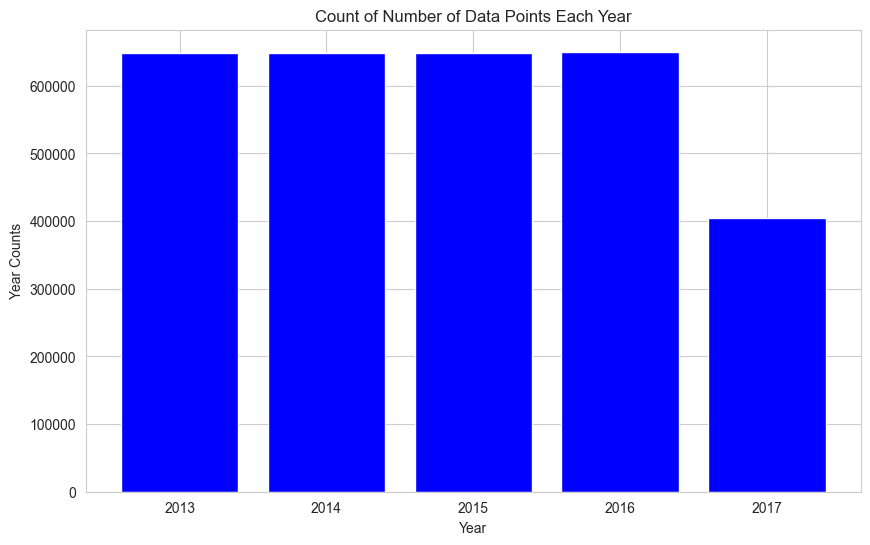

In [7]:
# copy train dataset so that we work with a copy, not the original
train_copy = train.copy()

# extracting the year column
train_copy['year'] = pd.to_datetime(train['date']).dt.year

# Grouping by year and count the data points
year_data = train_copy.groupby('year').size().reset_index(name='counts')

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(year_data['year'], year_data['counts'], color='blue')
ax.set_xticks(year_data['year'])
ax.set_title('Count of Number of Data Points Each Year')
ax.set_xlabel('Year')
ax.set_ylabel('Year Counts')

plt.show()

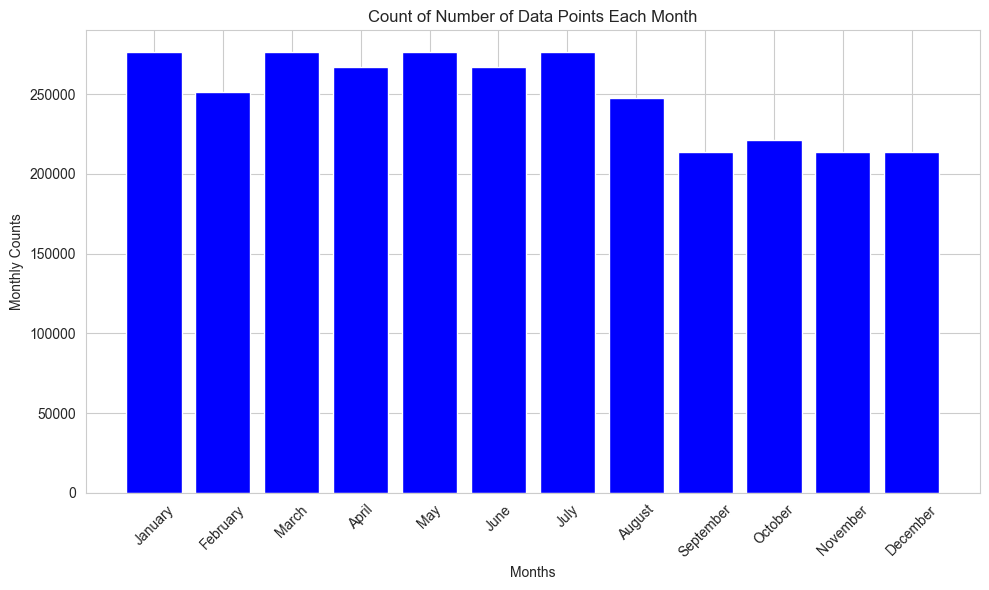

In [8]:
# extracting the month
train_copy['month'] = pd.to_datetime(train_copy['date']).dt.month

# Grouping by month and count the data points
monthly_data = train_copy.groupby('month').size().reset_index(name='counts')

# Renaming the month values for labeling
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_data['month'] = monthly_data['month'].apply(lambda x: month_names[x - 1])

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(monthly_data['month'], monthly_data['counts'], color='blue')
ax.set_title('Count of Number of Data Points Each Month')
ax.set_xlabel('Months')
ax.set_ylabel('Monthly Counts')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

#### Total sales by store

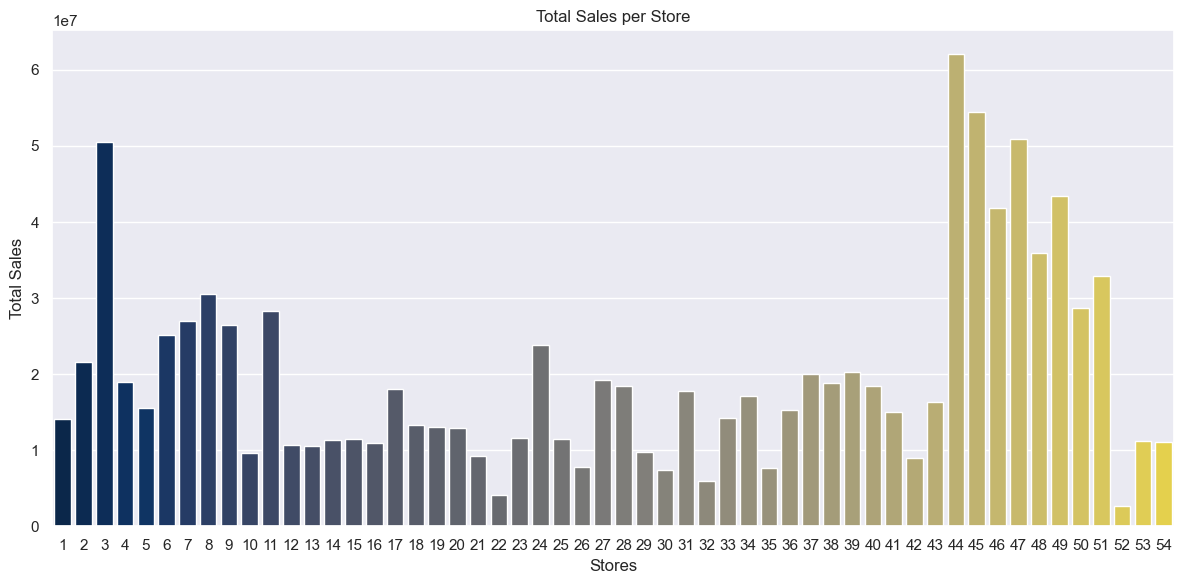

In [9]:
# Filter rows where unit_sales > 0
train_copy = train_copy[train['sales'] > 0]

# Group by 'store_nbr' and calculate the sum of 'unit_sales'
store_unit_sales = train_copy.groupby('store_nbr')['sales'].sum().reset_index()

# Set the figure size
sns.set(rc={'figure.figsize': (12, 6)})

# Create a barplot
sns.barplot(x='store_nbr', y='sales', data=store_unit_sales, palette='cividis')

# Set titles and labels
plt.title('Total Sales per Store')
plt.xlabel('Stores')
plt.ylabel('Total Sales')

# Show the plot
plt.tight_layout()
plt.show()

- Store number 44,45 have the highest total sales

#### Total sales daily

In [10]:
# Filter rows where unit_sales > 0
train_copy = train_copy[train_copy['sales'] > 0]

# Group by 'date' and calculate the sum of 'sales'
sales_date_agg = train_copy.groupby('date')['sales'].sum().reset_index()

# Create a lineplot using Plotly Express
fig = px.line(sales_date_agg, x='date', y='sales', title='Plot of Total Sales Over Time (Daily)')
fig.update_layout(width=1200, height=600)

# Add a range slider
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
# Show the plot
fig.show()

- upward trend year on year

### Test data

- The dates in the test data are for the 15 days after the last date in the training data.

In [11]:
# view first 5 rows
test.head()

id       date  store_nbr      family  onpromotion
0  3000888 2017-08-16          1  AUTOMOTIVE            0
1  3000889 2017-08-16          1   BABY CARE            0
2  3000890 2017-08-16          1      BEAUTY            2
3  3000891 2017-08-16          1   BEVERAGES           20
4  3000892 2017-08-16          1       BOOKS            0

In [12]:
# view info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [13]:
# check for missing values

test.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

### Transactions Dataset

- Contains date, store_nbr and transaction made on that specific date.

In [14]:
# view first 5 rows
transactions.head()

date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922

In [15]:
# view info
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [16]:
# check for missing values

transactions.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [17]:
# Visualize transactions over the years with plotly

fig = px.line(transactions, y="transactions",x='date', title="Transaction data over time")

# enable range slider with range selector
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

- Big spikes is transactions in december every year; indicates seasonality

### Stores Dataset

- Store metadata, including city, state, type, and cluster.

- cluster is a grouping of similar stores.

In [18]:
# view first 5 rows
stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [19]:
# view info
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [20]:
# check for missing values

stores.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

### Oil Dataset

- Daily oil price which includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and its economical health is highly vulnerable to shocks in oil prices.)

In [21]:
# view first 5 rows
oil.head()

date  dcoilwtico
0 2013-01-01         NaN
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-07       93.20

In [22]:
# view info
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [23]:
# check for missing values

oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

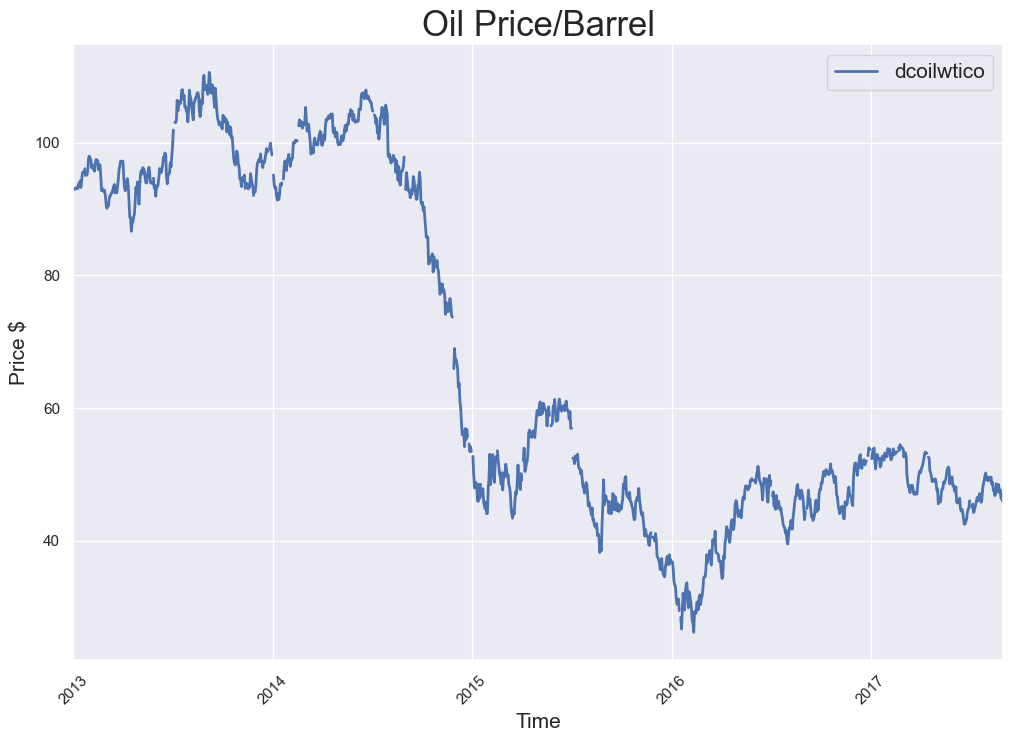

In [24]:
# Oil prices over time

ax = oil.plot(x='date',y='dcoilwtico',title='Oil Price/Barrel',figsize=(12,8),linewidth=2)

ax.title.set_size(25)
plt.legend(fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Price $',fontsize=15)
plt.tick_params(axis='x', labelrotation=45)

### Holiday/Events Dataset

- Holidays and Events, with metadata

NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was celebrated, look for the corresponding row where type is Transfer.

For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.

- Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

In [25]:
# view forst 5 rows
holidays.head()

date     type    locale locale_name                    description  \
0 2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1 2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2 2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3 2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4 2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [26]:
# view info
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [27]:
# check for missing values

holidays.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

### Research Questions

#### 1. Is the train dataset complete (has all the required dates)?

In [28]:
# Check for missing values
if train.isnull().values.any():
  print("The dataset is not complete. There are missing values.")
else:
  print("The dataset is complete.")

The dataset is complete.


- The dataset has no missing value. However let's check the completion of the dates.

##### Date completion

In [29]:
# Checking for missing dates
# Min and max dates (range of dates)

data_train_start = train.date.min()
data_train_end = train.date.max()

# Generate a date range from start_date to end_date
date_range = pd.date_range(start=data_train_start,end=data_train_end)

# Use the difference between the date_range and the unique dates in the sales data to find missing dates
missing_dates = date_range.difference(train['date'])

print("Missing dates:", missing_dates)

Missing dates: DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


- The train dataset is mising 4 dates.These missing dates follow a pattern (december 25th) from 2013-2016. This date is a worldwide holiday, and also a holiday in Ecuador.
- The assumption is that no data was collected on this day every year as the shops may be closed down on christmas each year.

- Missing dates will be added to the train dataset.

#### 2. Which dates have the lowest and highest sales for each year?

In [30]:
# Highest sales date in each year

train_copy['year'] = train_copy['date'].dt.year
max_sales = train_copy.groupby('year')['sales'].idxmax()
Result_max = train.loc[max_sales]
Result_max

id       date  store_nbr     family      sales  onpromotion
562596    562596 2013-11-12         44  GROCERY I  46,271.00            0
1257246  1257246 2014-12-08         35  GROCERY I  45,361.00            3
1916586  1916586 2015-12-14         35  GROCERY I  40,351.46            7
2163723  2163723 2016-05-02          2  GROCERY I 124,717.00           59
2760297  2760297 2017-04-02          9  GROCERY I  38,422.62           73

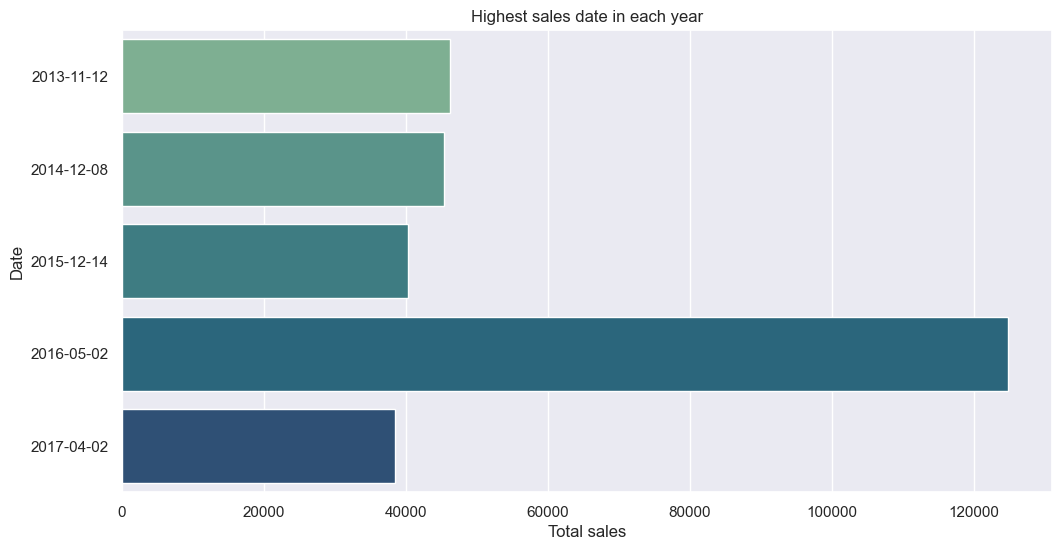

In [31]:
# Horizontal bar chart of dates with highest sales each year

sns.barplot(data=Result_max, y="date", x="sales", palette='crest')
plt.ylabel("Date")
plt.xlabel("Total sales")
plt.title("Highest sales date in each year")
plt.show()

- 2016/05/02 has the highest sales (124,717)

In [32]:
# lowest sales date in each year

min_sales = train_copy.groupby('year')['sales'].idxmin()
Result_min = train.loc[min_sales]
Result_min

id       date  store_nbr   family  sales  onpromotion
387782    387782 2013-08-06         39  SEAFOOD   0.12            0
1252052  1252052 2014-12-05         39  SEAFOOD   0.19            0
1756358  1756358 2015-09-15         39  SEAFOOD   0.20            0
2256638  2256638 2016-06-23         26  SEAFOOD   0.40            1
2666498  2666498 2017-02-09         26  SEAFOOD   0.43            0

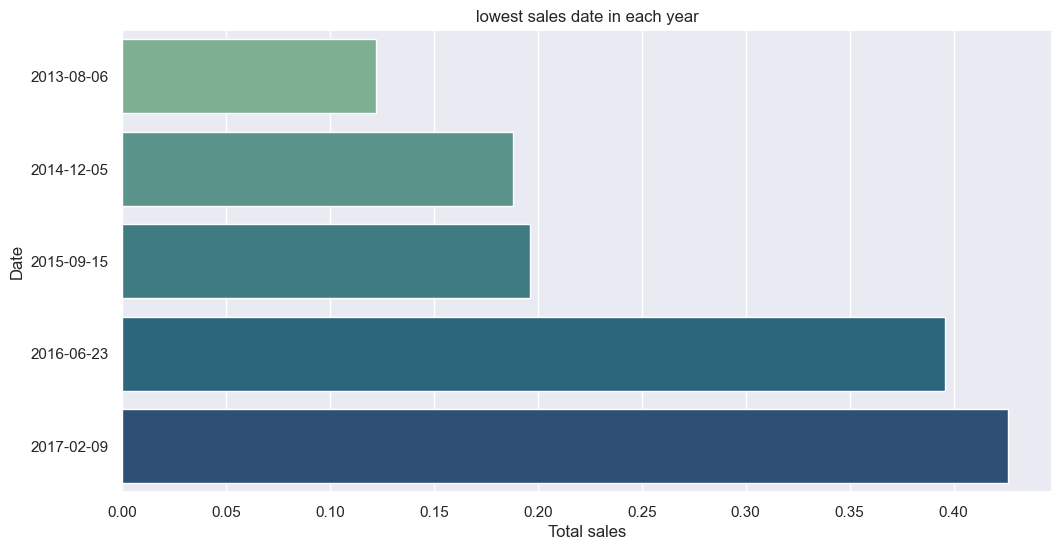

In [33]:
# Horizontal bar chart of dates with lowest sales each year

sns.barplot(data=Result_min, y="date", x="sales", palette='crest')
plt.ylabel("Date")
plt.xlabel("Total sales")
plt.title("lowest sales date in each year")
plt.show()

- 2013/08/06 has the lowest sales (0.12)

#### 3. Did the earthquake impact sales?

The 2016 Ecuador earthquake occurred on April 16 at 18:58:37 ECT with a moment magnitude of 7.8

In [34]:
# Set the 'date' column as the index

train_copy.set_index('date', inplace=True)

# Resample to weekly frequency, aggregating with mean

sales_daily_mean = train_copy["sales"].resample('D').mean()
sales_weekly_mean = train_copy["sales"].resample('W').mean()

Text(0.5, 1.0, 'April and May 2016 total sales')

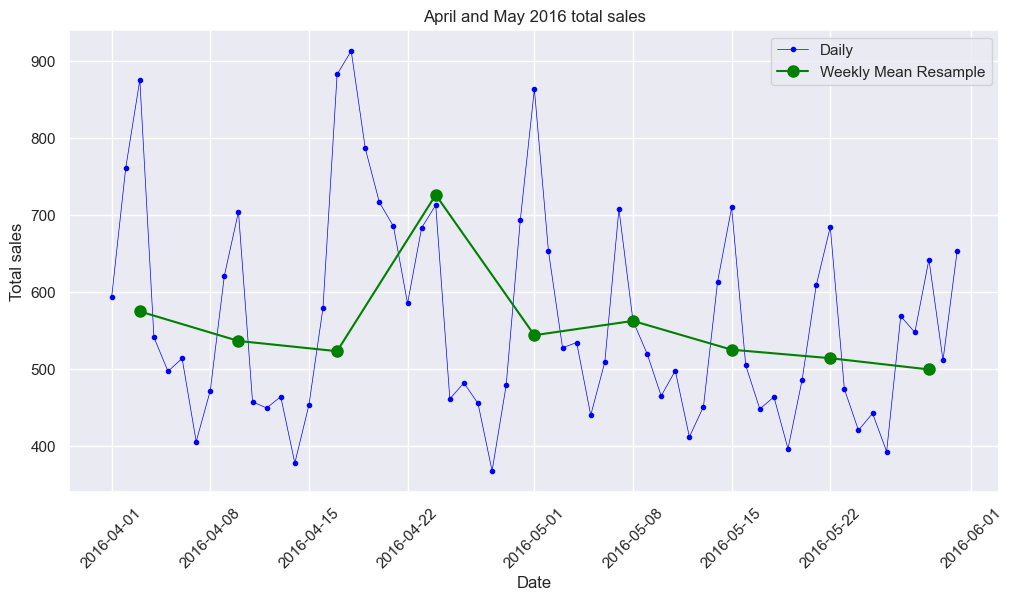

In [35]:
# Sales for April to May 2016.
start, end = '2016-04', '2016-05'

# Analyse before and after the earthquake

fig, ax = plt.subplots(figsize=(12,6))

color_daily = 'blue'
color_weekly = 'green'

ax.plot(sales_daily_mean.loc[start:end], marker='.', linestyle='-', linewidth=0.5, label='Daily', color=color_daily)
ax.plot(sales_weekly_mean.loc[start:end], marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample', color=color_weekly)
ax.set_ylabel("Total sales")
ax.set_xlabel("Date")
ax.tick_params(axis='x', labelrotation=45)
ax.legend()
ax.set_title("April and May 2016 total sales")

In the week of the earthquake (from April 14th to April 21st), daily and weekly sales increased during this week, reaching a peak on the days after the earthquake (18th), but then experienced a decline the next 4 days following the earthquake, returning to normalcy.

#### 4. Are certain groups of stores selling more products? (Cluster, city, state, type)

In [36]:
# Merge train and stores datasets

train_stores = pd.merge(train, stores)

train_stores.head()

id       date  store_nbr      family  sales  onpromotion   city      state  \
0   0 2013-01-01          1  AUTOMOTIVE   0.00            0  Quito  Pichincha   
1   1 2013-01-01          1   BABY CARE   0.00            0  Quito  Pichincha   
2   2 2013-01-01          1      BEAUTY   0.00            0  Quito  Pichincha   
3   3 2013-01-01          1   BEVERAGES   0.00            0  Quito  Pichincha   
4   4 2013-01-01          1       BOOKS   0.00            0  Quito  Pichincha   

  type  cluster  
0    D       13  
1    D       13  
2    D       13  
3    D       13  
4    D       13

##### Store sales by cluster

In [37]:
# Sum of sales by cluster

sales_clusters = train_stores.groupby("cluster", as_index=False)["sales"].sum()
sales_clusters.sort_values(by='sales', ascending=False)

cluster          sales
13       14 157,430,523.08
5         6 114,254,386.74
7         8 107,928,246.70
10       11 100,614,275.93
9        10  85,324,430.43
2         3  75,628,703.46
12       13  72,102,248.79
4         5  62,087,553.25
14       15  55,296,949.37
0         1  54,376,751.96
3         4  49,443,442.97
16       17  32,911,489.54
8         9  30,561,081.05
1         2  28,916,403.50
11       12  18,030,969.25
6         7  15,478,120.49
15       16  13,259,375.69

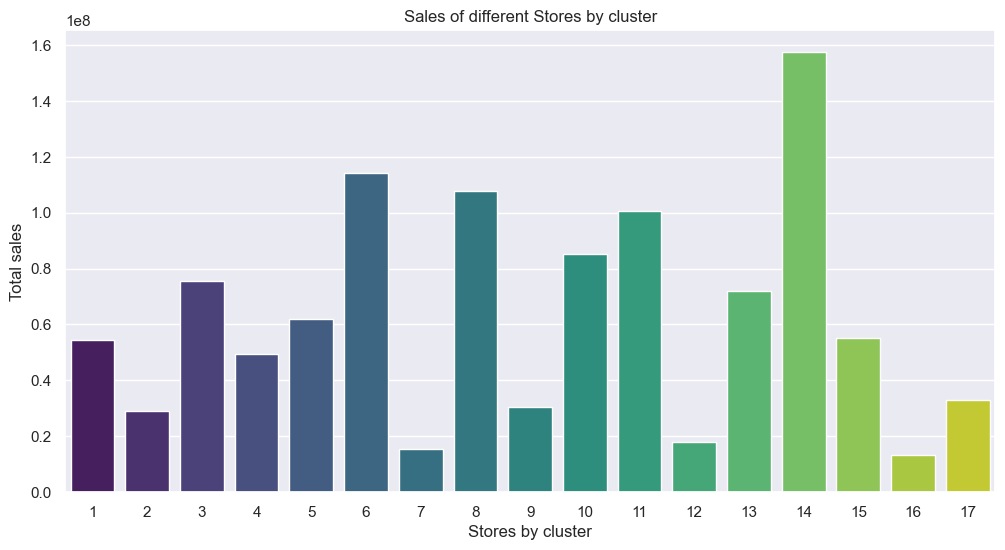

In [38]:
# vertical Bar chart of sales by cluster

ax = sns.barplot(data=sales_clusters, x = "cluster", y = "sales", palette='viridis')
plt.xlabel("Stores by cluster")
plt.ylabel("Total sales")
plt.title("Sales of different Stores by cluster")
plt.show()

- cluster 14 has the highest sales. cluster 16 has the lowest sales.

##### Store sales by city

In [39]:
# Sum of sales by city

sales_city = train_stores.groupby("city", as_index=False)["sales"].sum()
sales_city.sort_values(by='sales', ascending=False)

city          sales
18          Quito 556,741,836.83
8       Guayaquil 122,967,260.48
3          Cuenca  49,168,596.03
0          Ambato  40,304,401.30
21  Santo Domingo  35,834,323.04
13        Machala  33,386,796.54
2         Cayambe  28,325,558.48
10      Latacunga  21,182,263.78
4           Daule  19,188,021.38
12           Loja  18,859,999.26
1        Babahoyo  17,746,872.70
6      Esmeraldas  16,391,692.21
11       Libertad  15,322,431.10
17        Quevedo  14,178,501.29
14          Manta  13,912,337.02
7        Guaranda  13,049,509.84
9          Ibarra  11,451,270.02
20        Salinas  11,420,997.87
19       Riobamba  11,387,918.75
5       El Carmen  11,057,483.12
15         Playas   7,676,679.42
16           Puyo   4,090,201.74

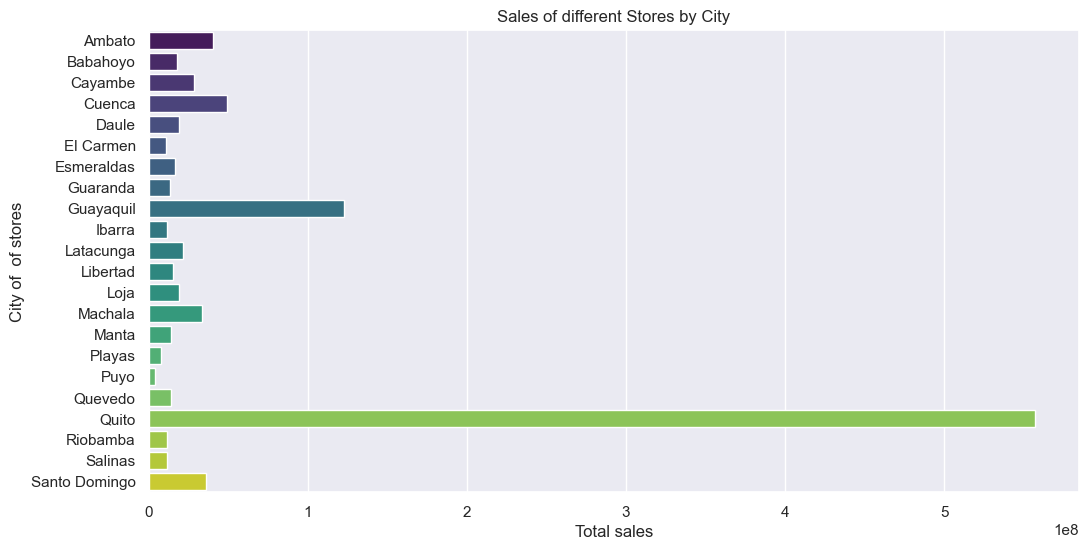

In [40]:
# horizontal Bar chart of sales by city

sns.barplot(data=sales_city, y = "city", x = "sales", palette='viridis')
plt.ylabel("City of  of stores")
plt.xlabel("Total sales")
plt.title("Sales of different Stores by City")
plt.show()

- Quito has the highest total sales, as it is the capital, and Puyo the lowest

##### Store sales by state

In [41]:
# Sum of sales by state

sales_state = train_stores.groupby("state", as_index=False)["sales"].sum()
sales_state.sort_values(by='sales', ascending=False)

state          sales
12                       Pichincha 585,067,395.31
6                           Guayas 165,154,392.38
0                            Azuay  49,168,596.03
15                      Tungurahua  40,304,401.30
14  Santo Domingo de los Tsachilas  35,834,323.04
4                           El Oro  33,386,796.54
9                         Los Rios  31,925,373.99
10                          Manabi  24,969,820.13
3                         Cotopaxi  21,182,263.78
8                             Loja  18,859,999.26
5                       Esmeraldas  16,391,692.21
1                          Bolivar  13,049,509.84
7                         Imbabura  11,451,270.02
13                     Santa Elena  11,420,997.87
2                       Chimborazo  11,387,918.75
11                         Pastaza   4,090,201.74

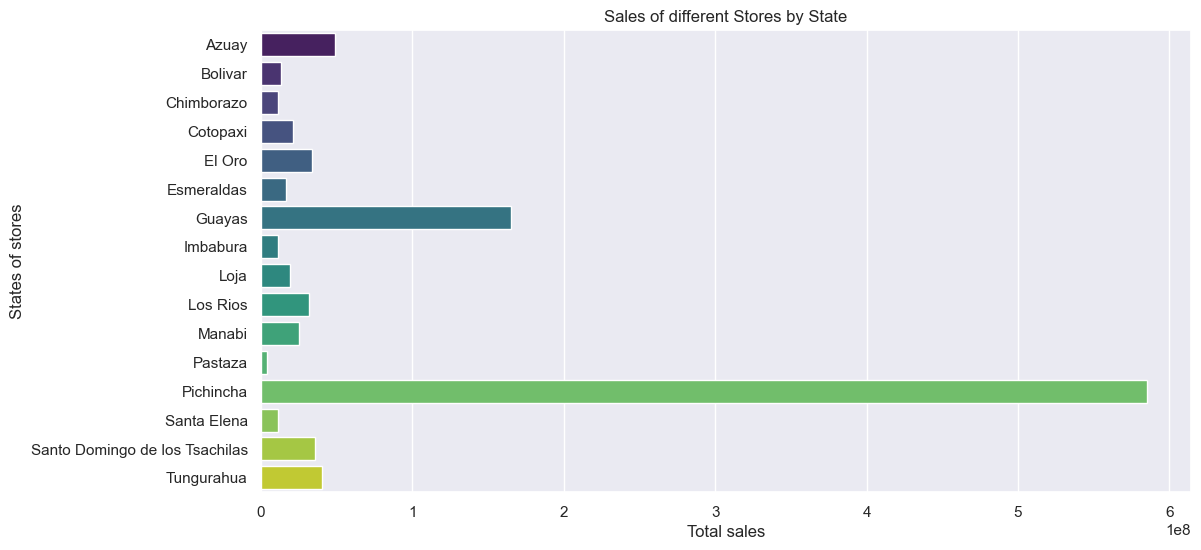

In [42]:
# horizontal Bar chart of sales by state

sns.barplot(data=sales_state, y = "state", x = "sales", palette='viridis')
plt.ylabel("States of stores")
plt.xlabel("Total sales")
plt.title("Sales of different Stores by State")
plt.show()

- Pichincha has the highest total sales
- Pastaza has the lowest total sales

##### Store sales by type

In [43]:
# Sum of sales by store type

sales_type = train_stores.groupby("type", as_index=False)["sales"].sum()
sales_type.sort_values(by='sales', ascending=False)

type          sales
0    A 353,043,841.80
3    D 351,083,296.86
2    C 164,434,742.56
1    B 145,260,635.13
4    E  59,822,435.84

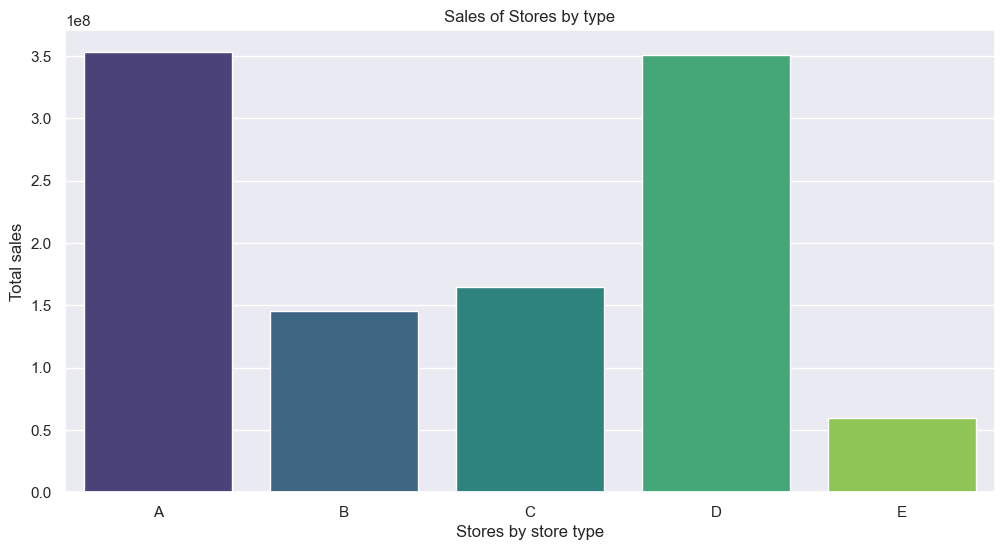

In [44]:
# vertical Bar chart of sales by store type

sns.barplot(data=sales_type, x = "type", y = "sales", palette='viridis')
plt.xlabel("Stores by store type")
plt.ylabel("Total sales")
plt.title("Sales of Stores by type")
plt.show()

- type A nd D have the highest total sales

#### 5. Are sales affected by promotions, oil prices and holidays?

##### Sales and promotions

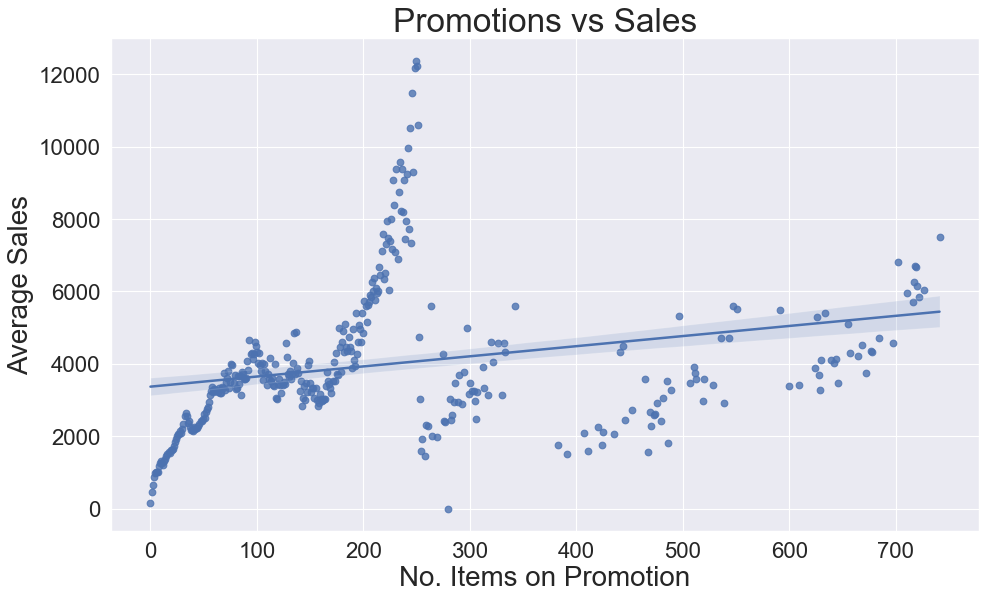

In [45]:
# Copy the data_train dataset
data_sales_prom = train.copy()

# Plot the average sales vs items on promotion
data_sales_prom = data_sales_prom.groupby(['onpromotion'],as_index=False)['sales'].mean()
plt.figure(figsize=(14,8),dpi=80)
sns.regplot(data=data_sales_prom, x='onpromotion',y='sales')
plt.ylabel("Average Sales",fontsize=25)
plt.title("Promotions vs Sales",fontsize=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('No. Items on Promotion',fontsize=25)
plt.show()

- The average sales increase when there are more items on promotion.

##### Sales and oil prices

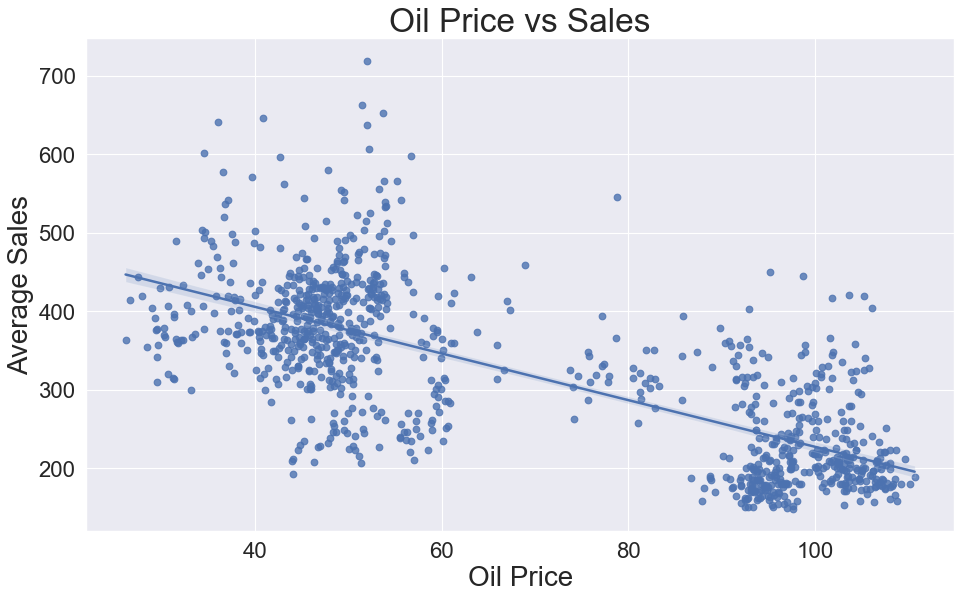

In [46]:
# Copy the data_train dataset
data_sales_oil = train.copy()

# Merge the sales and oil price datasets
data_sales_oil = train.merge(oil,on=["date"],how="left")

# Plot the average sales vs oil prices
data_sales_oil = data_sales_oil.groupby(['dcoilwtico'],as_index=False)['sales'].mean()
plt.figure(figsize=(14,8),dpi=80)
sns.regplot(data=data_sales_oil, x='dcoilwtico', y='sales')
plt.ylabel("Average Sales",fontsize=25)
plt.title("Oil Price vs Sales",fontsize=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Oil Price',fontsize=25)
plt.show()

- Higher oil prices equal lower average sales

##### Sales and holidays

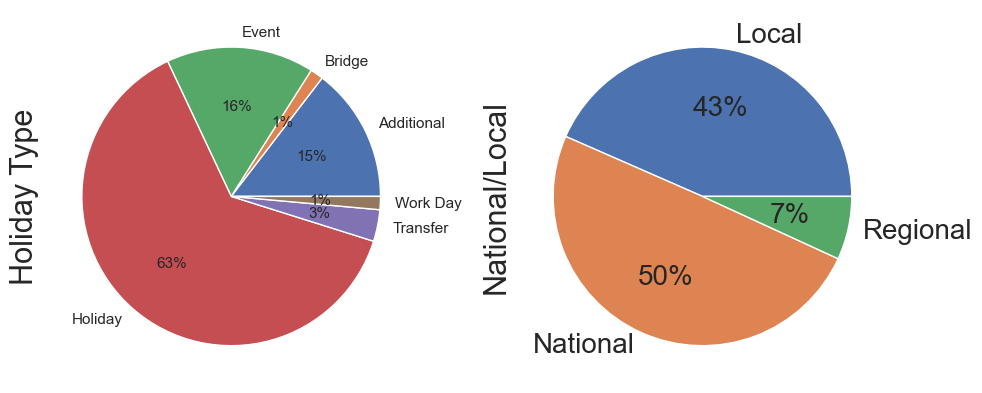

In [47]:
def label_function(val):
    return f'{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

holidays.groupby('type').size().plot(kind='pie',autopct=label_function,textprops={'fontsize':11},ax=ax1)
holidays.groupby('locale').size().plot(kind='pie',autopct=label_function,textprops={'fontsize': 20},ax=ax2)

ax1.set_ylabel('Holiday Type',size=22)
ax2.set_ylabel('National/Local',size=22)
plt.tight_layout()
plt.show()

- The main type of holiday are normal calendar holidays. Half of them are national holidays.

In [48]:
# merge train and holidays dataset

merge_2 = train_copy.merge(
    holidays, 
    how='left', 
    on=['date'])
    
merge_2.reset_index()
merge_2.head()

date   id  store_nbr        family  sales  onpromotion  year  month  \
0 2013-01-01  563         25        BEAUTY   2.00            0  2013      1   
1 2013-01-01  564         25     BEVERAGES 810.00            0  2013      1   
2 2013-01-01  566         25  BREAD/BAKERY 180.59            0  2013      1   
3 2013-01-01  568         25      CLEANING 186.00            0  2013      1   
4 2013-01-01  569         25         DAIRY 143.00            0  2013      1   

      type    locale locale_name         description transferred  
0  Holiday  National     Ecuador  Primer dia del ano       False  
1  Holiday  National     Ecuador  Primer dia del ano       False  
2  Holiday  National     Ecuador  Primer dia del ano       False  
3  Holiday  National     Ecuador  Primer dia del ano       False  
4  Holiday  National     Ecuador  Primer dia del ano       False

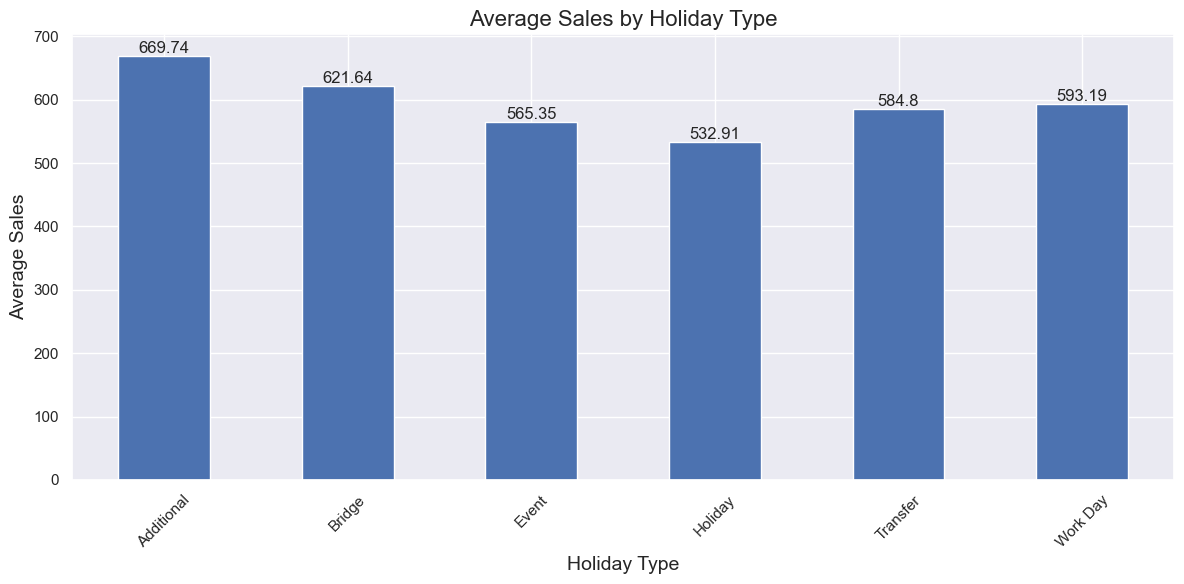

In [49]:
# Group the data by holiday type and calculate the average sales for each type
avg_sales_by_type = merge_2.groupby("type").agg({"sales": "mean"})

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot a bar chart of the average sales by holiday type
avg_sales_by_type.plot(kind="bar", y="sales", ax=ax, legend=False)

# Add labels to the bars
for index, value in enumerate(avg_sales_by_type["sales"]):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', fontsize=12)

# Add a title and labels
ax.set_title("Average Sales by Holiday Type", fontsize=16)
ax.set_xlabel("Holiday Type", fontsize=14)
ax.set_ylabel("Average Sales", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- Additional holidays have the highest average sales.
* Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

#### 6. What analysis can we get from the date and its extractable features?

In [50]:
# Function to extract features from date column

def getDateFeatures(df, date):
    df['date'] = pd.to_datetime(df[date])
    df['month'] = df['date'].dt.month
    df['Month'] = df['date'].dt.month_name()
    df['Day'] = df['date'].dt.day_name()
    df['day_of_month'] = df['date'].dt.day
    df['day_of_year'] = df['date'].dt.dayofyear
    df['week_of_year'] = df['date'].dt.isocalendar().week
    df['day_of_week'] = df['date'].dt.dayofweek
    df['year'] = df['date'].dt.year
    df["is_weekend"] = np.where(df['day_of_week'] > 4, 1, 0)
    df['quarter'] = df['date'].dt.quarter
    return df

In [51]:
# run our train data through our function

train_copy = train_copy.reset_index()
train_data = getDateFeatures(train_copy, "date")
train_data.head()

date   id  store_nbr        family  sales  onpromotion  year  month  \
0 2013-01-01  563         25        BEAUTY   2.00            0  2013      1   
1 2013-01-01  564         25     BEVERAGES 810.00            0  2013      1   
2 2013-01-01  566         25  BREAD/BAKERY 180.59            0  2013      1   
3 2013-01-01  568         25      CLEANING 186.00            0  2013      1   
4 2013-01-01  569         25         DAIRY 143.00            0  2013      1   

     Month      Day  day_of_month  day_of_year  week_of_year  day_of_week  \
0  January  Tuesday             1            1             1            1   
1  January  Tuesday             1            1             1            1   
2  January  Tuesday             1            1             1            1   
3  January  Tuesday             1            1             1            1   
4  January  Tuesday             1            1             1            1   

   is_weekend  quarter  
0           0        1  
1           0        1  
2           0        1  
3           0        1  
4           0        1

##### Sales on Pay Day (Semi-Monthly)

In [52]:
# list with semi monthly pay day range (15th and last day 30/31st of the month)

pay_day = pd.date_range(start=train_data.date.min(), end=train_data.date.max(), freq='SM').astype('str').tolist()

In [53]:
# create payday column

train_data["pay_day"] = np.where(train_data["date"].isin(pay_day), 1, 0)
train_data['pay_day'].value_counts()

pay_day
0    1925095
1     136663
Name: count, dtype: int64

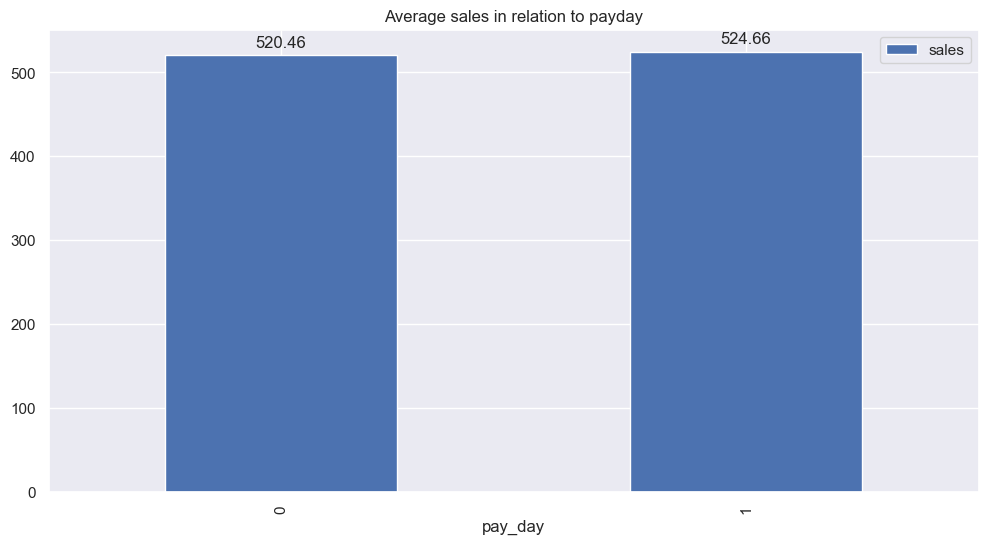

In [54]:
# Plot the average sales in relation to payday

ax = train_data.groupby(["pay_day"], as_index=False)['sales'].mean()\
                                    .plot("pay_day", "sales", kind="bar", figsize=(12,6),
                                         title="Average sales in relation to payday")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')


- Average payday sales are slightly higher than non-payday sales

##### Sales by day of the month

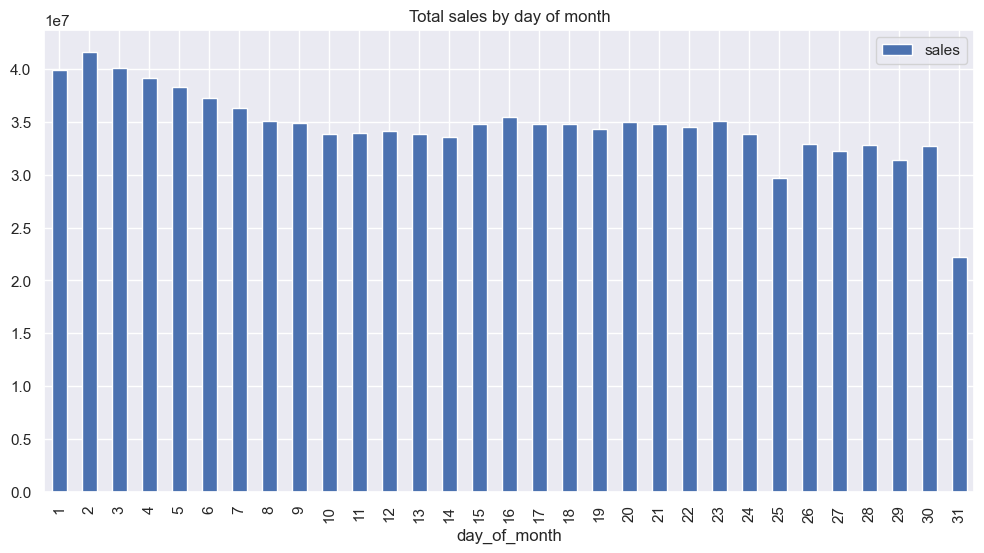

In [55]:
# plot the sum of sales by day of the month
# which day of the month has the most sales?

ax = train_data.groupby(["day_of_month"], as_index=False)["sales"].sum()\
                                    .plot("day_of_month", "sales", kind="bar", figsize=(12,6),
                                         title="Total sales by day of month")

- Beginning of the month has high sales (1st - 3rd), with a gradual decline afterwards, but there is an overall uniform trend.

##### Sales by week of the year

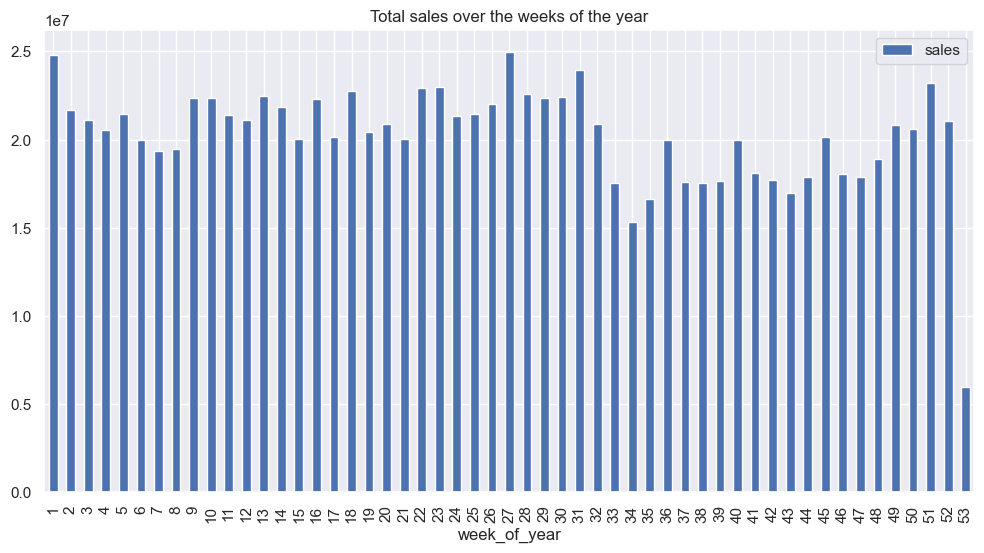

In [56]:
# plot the sum of sales by the weeks of the year

sales_by_week = train_data.groupby(["week_of_year"], as_index=False)['sales'].sum()

ax = sales_by_week.plot("week_of_year", "sales", kind="bar", figsize=(12, 6),
                         title="Total sales over the weeks of the year")

- First week and mid year (week 27) have the highest sales

##### Sales by month

In [57]:
# group the sum of sales by month of the year
# which month has the highest sales?

purchase_month = train_data.groupby("Month", as_index=False)["sales"].sum().sort_values(by="sales", ascending=False)
purchase_month = purchase_month.reset_index(drop=True)
purchase_month

Month          sales
0        July 103,363,060.69
1       March  97,228,487.15
2    December  97,027,840.76
3        June  94,516,703.29
4     January  94,442,152.32
5         May  94,399,137.02
6       April  90,668,117.56
7      August  83,472,376.84
8    February  80,637,229.44
9    November  80,335,788.06
10    October  80,080,379.16
11  September  77,473,679.92

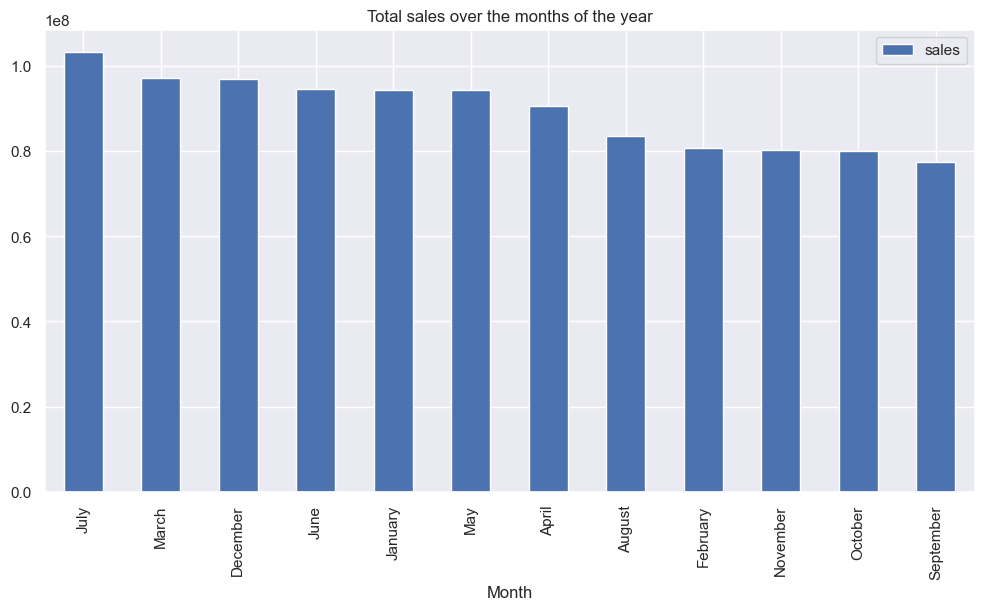

In [58]:
# plot the sum of sales by month of the year

ax = purchase_month.plot("Month", "sales", kind="bar", figsize=(12, 6),
                         title="Total sales over the months of the year")

- July(Summer) has the highest sales, followed by march (probaly easter), and december

##### Sales by Day of the week

In [59]:
# group the sum of sales by day of the week
# which day has the highest sales?

purchase_day = train_data.groupby("Day", as_index=False)["sales"].sum().sort_values(by="sales", ascending=False)
purchase_day = purchase_day.reset_index(drop=True)
purchase_day

Day          sales
0     Sunday 198,052,349.18
1   Saturday 186,101,548.14
2     Monday 148,827,793.85
3  Wednesday 142,378,692.83
4     Friday 139,097,846.66
5    Tuesday 137,922,113.28
6   Thursday 121,264,608.27

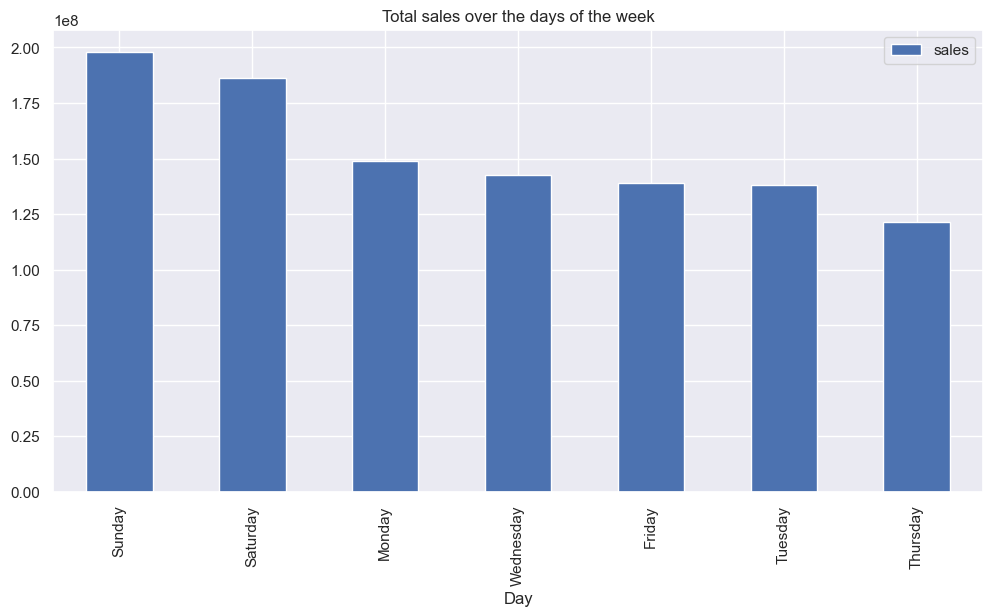

In [60]:
# plot the sum of sales by day of the week

ax = purchase_day.plot("Day", "sales", kind="bar", figsize=(12, 6),
                         title="Total sales over the days of the week")

- Sunday and saturday (weekends) have the highest sales

##### Sales by season

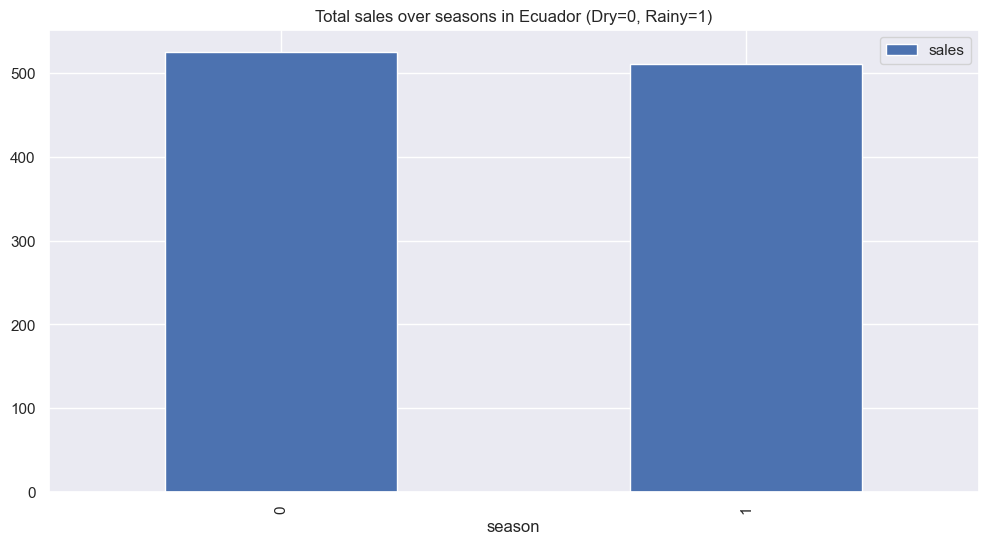

In [61]:
# create column for rainy and dry season

train_data["season"] = np.where(train_data["month"].isin([6,7,8,9]), 1, 0)

# plot average of sales by season of the year (Dry or Rainy)
sales_by_season = train_data.groupby(["season"], as_index=False)['sales'].mean()

ax = sales_by_season.plot("season", "sales", kind="bar", figsize=(12, 6),
                          title="Total sales over seasons in Ecuador (Dry=0, Rainy=1)")


- Tropical countries like Ecuador have 2 seasons (Dry and rainy)
- Dry season has higher sales compared to rainy season

##### Sales by quarter

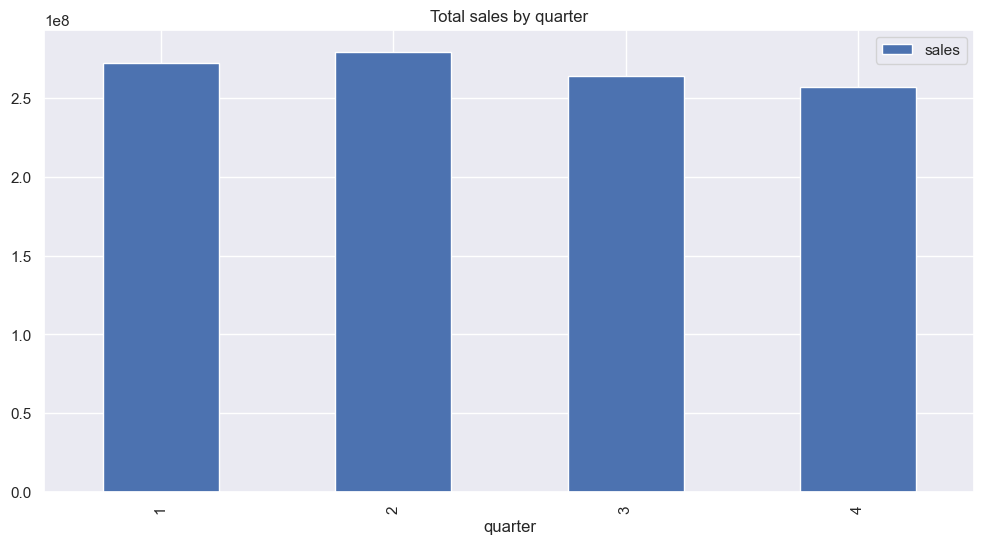

In [62]:
# plot the sum of sales by quarter of the year

sales_by_quarter = train_data.groupby(["quarter"], as_index=False)['sales'].sum()

ax = sales_by_quarter.plot("quarter", "sales", kind="bar", figsize=(12, 6),
                          title="Total sales by quarter")

#### 7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

- MSE( Mean Squared Error) is a widely used metric for regression problems.
It measures the average of the squared differences between predicted and actual values.
MSE is sensitive to outliers because it squares the differences.

- RMSE (Root Mean Squared Error) is the square root of the MSE.
It's often used because it has the same unit of measurement as the target variable, which makes it more interpretable.
RMSE treats all errors equally.

- RMSLE (Root Mean Squared Logarithmic Error) is commonly used when you want to penalize underpredictions more than overpredictions and when the target variable has a wide range.
It first takes the natural logarithm of the predicted and actual values and then computes the RMSE of those log values. RMSLE takes the logarithm of the values before computing the error, which can be useful when dealing with skewed data or when you want to give less weight to large errors for large values

-  MSE is a greater value because it is calculated as the average of the squared differences between predicted and actual values. When you square the differences between predicted and actual values, even small errors get larger because negative differences (i.e., underpredictions) become positive. It also magnifies larger errors, especially outliers.

## Hypothesis testing

**Null Hypothesis (H0)**:
"There is no significant relationship between store sales and promotions."

**Alternative Hypothesis (Ha)**:
"There is a significant relationship between store sales and promotions."

In [63]:
# encode categorical features

train_copy['onpromotion_encoded'] = np.where(train_copy['onpromotion'] >= 1, 1, 0)
train_copy['onpromotion_encoded'].value_counts()

onpromotion_encoded
0    1450446
1     611312
Name: count, dtype: int64

### T-test

The t-test is a statistical hypothesis test that assesses whether the means of two groups are significantly different from each other (an independent two-sample t-test)

In [64]:
# Extract the sales of products when they are on promotion and when they are not
sales_on_promotion = train_copy[train_copy['onpromotion_encoded'] == 1]['sales']
sales_not_on_promotion = train_copy[train_copy['onpromotion_encoded'] == 0]['sales']

# Calculate the sample sizes
n1 = len(sales_on_promotion)
n2 = len(sales_not_on_promotion)

# Calculate the degrees of freedom
degrees_of_freedom = n1 + n2 - 2  # Assuming equal variances, subtract 2 for two samples

# Set the significance level
alpha = 0.05

# Calculate the critical t-values for a two-tailed test
critical_t_value = t.ppf(1 - alpha / 2, degrees_of_freedom)

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(sales_on_promotion, sales_not_on_promotion)

# Print the t-statistic, p-value, degrees of freedom, and critical t-values
print("t-statistic:", t_stat)
print("p-value:", p_value)
print("Degrees of Freedom:", degrees_of_freedom)
print(f"Critical t-value (α = {alpha/2}):", -critical_t_value)  # Left tail
print(f"Critical t-value (α = {alpha/2}):", critical_t_value)   # Right tail

# Check if the absolute t-statistic falls within the critical value range
if t_stat >= -critical_t_value and t_stat <= critical_t_value:
    print("\nThe absolute t-statistic falls within the critical value range.")
else:
    print("\nThe absolute t-statistic does not fall within the critical value range.")


t-statistic: 466.1532931598274
p-value: 0.0
Degrees of Freedom: 2061756
Critical t-value (α = 0.025): -1.9599651351478848
Critical t-value (α = 0.025): 1.9599651351478848

The absolute t-statistic does not fall within the critical value range.


- There is a statistically significant difference in sales between products when they are on promotion and when they are not on promotion (p-value < 0.05) and the t-statistic does not fall within the critical value range
- We have strong evidence to **reject the null hypothesis!!**

### Chi-Squared contingency test

- The chi-squared statistic measures the strength of the association or dependence between the two categorical variables

In [65]:
# Create contingency table
contingency_table = pd.crosstab(train_copy['onpromotion_encoded'], train_copy['sales'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-squared statistic: ", chi2)
print("p-value: ", p)

Chi-squared statistic:  853431.6902295031
p-value:  0.0


- This indicates a strong association between the onpromotion and sales.

# 3. Data Preparation

- Deal with missing vales after merging, creating new features and adding missing dates
- Rename a few columns to be more readable
- Ensure dtypes are correct for each column

In [66]:
# shape overview to doubleckeck

train.shape, test.shape

((3000888, 6), (28512, 5))

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [68]:
# check for duplicates

train.duplicated().any(), 
stores.duplicated().any(), 
oil.duplicated().any(),  
test.duplicated().any(),  
holidays.duplicated().any(),
transactions.duplicated().any()

False

In [69]:
# check for missing values in train data

train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

#### Missing Dates

In [70]:
missing_dates = date_range.difference(train['date'])

print("Missing dates:", missing_dates)

Missing dates: DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


In [71]:
store_nbr = train['store_nbr'].unique()

print(f'Unique stores in the train data are {store_nbr.size}')
store_nbr

Unique stores in the train data are 54


array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

In [72]:
families = train['family'].unique()

print(f'Unique families in the train data are {families.size}')
families

Unique families in the train data are 33


array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [73]:
from itertools import product

missing_data_points = product(missing_dates, store_nbr, families)

new_data = pd.DataFrame(data=missing_data_points, columns=['date', 'store_nbr', 'family'])
new_data.tail()

date  store_nbr                      family
7123 2016-12-25          9                     POULTRY
7124 2016-12-25          9              PREPARED FOODS
7125 2016-12-25          9                     PRODUCE
7126 2016-12-25          9  SCHOOL AND OFFICE SUPPLIES
7127 2016-12-25          9                     SEAFOOD

In [74]:
train = pd.concat([train, new_data],axis=0)
train.set_index('date', inplace=True)
train.tail()

id  store_nbr                      family  sales  onpromotion
date                                                                     
2016-12-25 NaN          9                     POULTRY    NaN          NaN
2016-12-25 NaN          9              PREPARED FOODS    NaN          NaN
2016-12-25 NaN          9                     PRODUCE    NaN          NaN
2016-12-25 NaN          9  SCHOOL AND OFFICE SUPPLIES    NaN          NaN
2016-12-25 NaN          9                     SEAFOOD    NaN          NaN

In [75]:
# drop 'id' column
train.drop(columns=['id'], inplace=True)

In [76]:
train.isna().sum()

store_nbr         0
family            0
sales          7128
onpromotion    7128
dtype: int64

In [77]:
missing_dates = set(date_range) - set(train.index.unique())

print("Missing dates:", missing_dates)

Missing dates: set()


In [78]:
train['sales'] = train['sales'].fillna(0)
train['onpromotion'] = train['onpromotion'].fillna(0)

In [79]:
train.isna().sum()

store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [80]:
train.sort_index(inplace=True)
train.tail()

store_nbr                   family  sales  onpromotion
date                                                              
2017-08-15         25                  POULTRY 172.52         0.00
2017-08-15         25  PLAYERS AND ELECTRONICS   3.00         0.00
2017-08-15         25             PET SUPPLIES   3.00         0.00
2017-08-15         26                    BOOKS   0.00         0.00
2017-08-15          1                BABY CARE   0.00         0.00

### Downsampling

Resampling to a lower frequency (downsampling) usually involves an aggregation operation — for example, computing monthly sales totals from daily data. It is also known as "aggregation" or "reduction," and is a data transformation technique used to reduce the granularity of data by reducing the number of data points in a dataset. 

It involves converting high-frequency or fine-grained data into lower-frequency or coarser-grained data. The main purpose of downsampling is to make data more manageable, reduce computational and storage requirements, and make it easier to visualize and analyze data over longer time periods. It can also help in cases where the fine-grained data contains a lot of noise, and reducing the data points can reveal underlying trends and patterns.

In [81]:
train_downsampled = train.reset_index()
train_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008016 entries, 0 to 3008015
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 114.7+ MB


In [82]:
# resample data to daily frequency and compute the sum of sales for each day
cols = ['date', 'sales']

daily_sum_sales = train_downsampled[cols].set_index('date').resample('D').sum()
print(daily_sum_sales.shape)
daily_sum_sales.head()

(1688, 1)


sales
date                 
2013-01-01   2,511.62
2013-01-02 496,092.42
2013-01-03 361,461.23
2013-01-04 354,459.68
2013-01-05 477,350.12

In [83]:
# plot of daily sum sales

fig = px.line(daily_sum_sales, x=daily_sum_sales.index, y='sales', title='Sum of Daily Sales')
fig.update_xaxes(rangeslider_visible=True)

fig.show()

### Stationarity Test

A time series has to have some statistical properties [to be able to stationary](https://python.plainenglish.io/time-series-analysis-mastering-the-concepts-of-stationarity-c9fc489893cf):

- **Constant mean**: There is no trend over time.
- **Constant variance, covariance**: The scale of the data doesn’t change and the relationship between observations is consistent.
- **No seasonality**: Statistical properties of seasonal data changes regularly. Therefore, there is a pattern of change in the mean.

- Ho (Null Hypothesis): The time series data is non-stationary
- H1 (alternate Hypothesis): The time series data is stationary

#### ADF Test

In [86]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(dataframe, var):
    dataframe['sales_rolling_avg'] = dataframe[var].rolling(window=7).mean()
    dataframe['sales_rolling_std'] = dataframe[var].rolling(window=7).std()

    adftest = adfuller(dataframe[var], autolag='AIC')
    stats = pd.Series(adftest[0:4], index=['Test Statistic', 'p-value', '#lags used', 'number of observations used'])
    print(stats)

    for key, value in adftest[4].items():
        print('criticality', key, ':', value)

    if adftest[1] < 0.05:
        print('Series is stationary')
    else:
        print('Series is not stationary')
    
    sns.lineplot(data=dataframe, x=dataframe.index, y=var, label='Original')
    sns.lineplot(data=dataframe, x=dataframe.index, y='sales_rolling_avg', label='Rolling Average')
    sns.lineplot(data=dataframe, x=dataframe.index, y='sales_rolling_std', label='Rolling Standard Deviation')

Test Statistic                   -2.57
p-value                           0.10
#lags used                       22.00
number of observations used   1,665.00
dtype: float64
criticality 1% : -3.434283579780684
criticality 5% : -2.863277451883613
criticality 10% : -2.5676949772294817
Series is not stationary


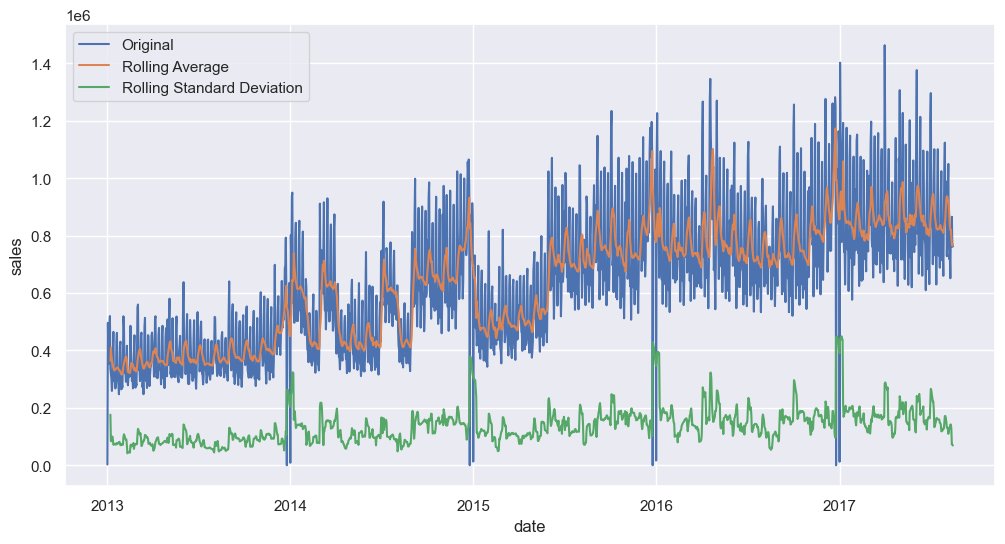

In [87]:
test_stationarity(daily_sum_sales, 'sales')

- Rolling statistics (rolling average and rolling standard deviation) are used in time series analysis to smooth out short-term fluctuations and highlight longer-term trends in the data. They provide a way to better understand the underlying patterns and variations in the time series over time.

In [88]:
daily_sum_sales.head(10)

sales  sales_rolling_avg  sales_rolling_std
date                                                       
2013-01-01   2,511.62                NaN                NaN
2013-01-02 496,092.42                NaN                NaN
2013-01-03 361,461.23                NaN                NaN
2013-01-04 354,459.68                NaN                NaN
2013-01-05 477,350.12                NaN                NaN
2013-01-06 519,695.40                NaN                NaN
2013-01-07 336,122.80         363,956.18         176,108.94
2013-01-08 318,347.78         409,075.63          84,925.22
2013-01-09 302,530.81         381,423.97          83,367.99
2013-01-10 258,982.00         366,784.08          95,563.74

In [89]:
daily_sum_sales = daily_sum_sales.iloc[:, :-2]
daily_sum_sales.head()

sales
date                 
2013-01-01   2,511.62
2013-01-02 496,092.42
2013-01-03 361,461.23
2013-01-04 354,459.68
2013-01-05 477,350.12

### Differencing

- Differencing is a technique used to remove trends or seasonality from a time series data. It involves subtracting the previous value from the current value to detect and remove patterns that vary over time.

In [90]:
daily_sum_sales['shift'] = daily_sum_sales.sales.shift()
daily_sum_sales['shiftDiff'] = daily_sum_sales['sales'] - daily_sum_sales['shift']
daily_sum_sales.head()

sales      shift   shiftDiff
date                                        
2013-01-01   2,511.62        NaN         NaN
2013-01-02 496,092.42   2,511.62  493,580.80
2013-01-03 361,461.23 496,092.42 -134,631.19
2013-01-04 354,459.68 361,461.23   -7,001.55
2013-01-05 477,350.12 354,459.68  122,890.44

Test Statistic                  -11.31
p-value                           0.00
#lags used                       25.00
number of observations used   1,661.00
dtype: float64
criticality 1% : -3.4342930672797065
criticality 5% : -2.8632816397229064
criticality 10% : -2.567697207194407
Series is stationary


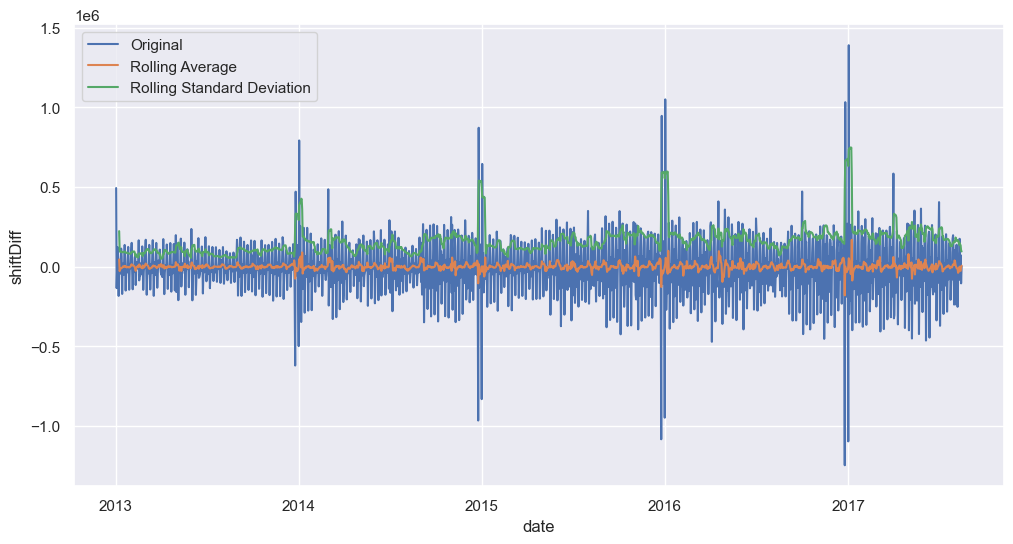

In [91]:
test_stationarity(daily_sum_sales.dropna(), 'shiftDiff')

In [92]:
daily_sum_sales = daily_sum_sales.iloc[:, :-2]
daily_sum_sales.head()

sales
date                 
2013-01-01   2,511.62
2013-01-02 496,092.42
2013-01-03 361,461.23
2013-01-04 354,459.68
2013-01-05 477,350.12

In [93]:
daily_sum_sales['firstDiff'] = daily_sum_sales['sales'].diff()
daily_sum_sales['weeklyDiff'] = daily_sum_sales['sales'].diff(7)
daily_sum_sales.head(10)

sales   firstDiff  weeklyDiff
date                                         
2013-01-01   2,511.62         NaN         NaN
2013-01-02 496,092.42  493,580.80         NaN
2013-01-03 361,461.23 -134,631.19         NaN
2013-01-04 354,459.68   -7,001.55         NaN
2013-01-05 477,350.12  122,890.44         NaN
2013-01-06 519,695.40   42,345.28         NaN
2013-01-07 336,122.80 -183,572.60         NaN
2013-01-08 318,347.78  -17,775.02  315,836.16
2013-01-09 302,530.81  -15,816.97 -193,561.61
2013-01-10 258,982.00  -43,548.81 -102,479.23

### Autocorrelation

Autocorrelation is a measure of how correlated time series data is at a given point in time with past values.Also known as serial correlation, it measures the relationship between a time series and its lagged values. It quantifies the degree of correlation between observations at different time points within the same series. Autocorrelation is an important concept in time series analysis as it helps identify patterns and dependencies in the data.

#### Importance of Autocorrelation

- It helps identify patterns and dependencies in the data
- It helps in determining the appropriate lag order of the Autoregressive (AR) or Moving Average(MA)
- It is useful in identifying potential forecasting models

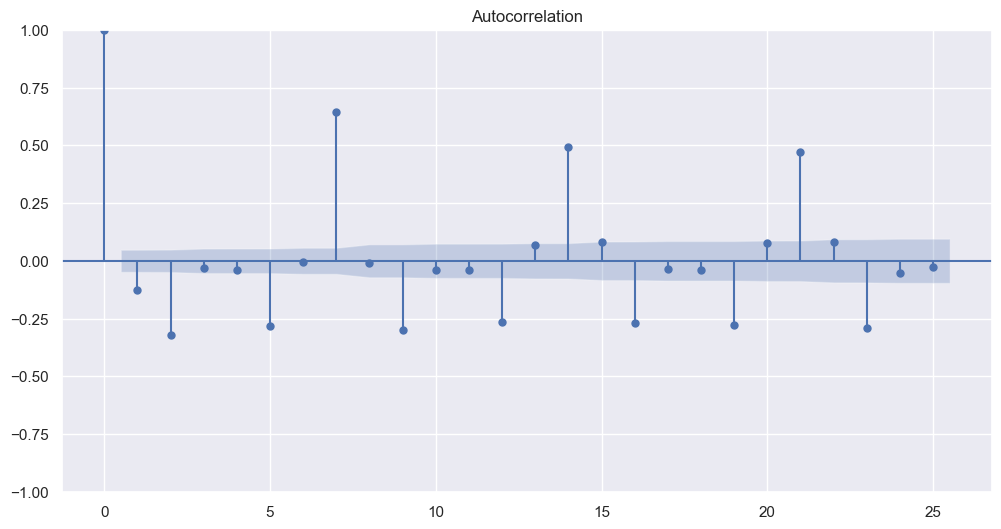

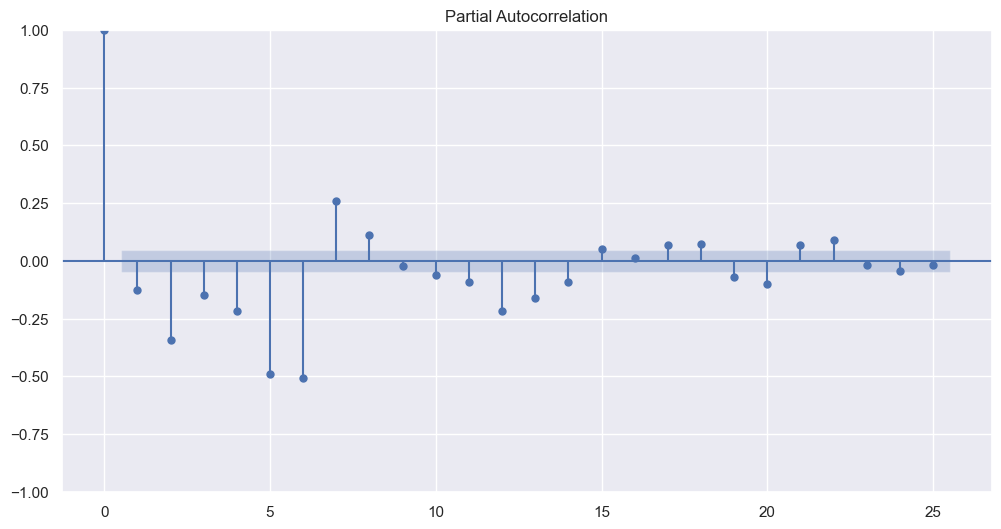

In [94]:
acf = plot_acf(daily_sum_sales['firstDiff'].dropna(), lags = 25)
pacf = plot_pacf(daily_sum_sales['firstDiff'].dropna(), lags = 25)

#### Autocorrelation (ACF) plot

Each bar represents the correlation between the time series and its lagged values at different lags.

#### Partial autocorrelation (PACF) plot

Each bar represents the correlation between the time series and its lagged values while removing the effects of the intermediate lags. The PACF helps to identify the direct influence of each lag on the current value. Positive values indicate a positive correlation, while negative values indicate a negative correlation.

### Data Splitting

In [95]:
# Specify the date to split the data
split_date = '2017-01-01'

# Create train and test splits based on the index order
training_set = daily_sum_sales.loc[daily_sum_sales.index < split_date]
eval_set = daily_sum_sales.loc[daily_sum_sales.index >= split_date]

training_set.shape, eval_set.shape

((1461, 3), (227, 3))

# 4. Modelling

## AR model

In [97]:
# create an autoregressive model with lag of 7
# fit the model to the training data

model_1 = AutoReg(training_set['firstDiff'].dropna(), lags = 7).fit()

In [98]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              firstDiff   No. Observations:                 1460
Model:                     AutoReg(7)   Log Likelihood              -18874.500
Method:               Conditional MLE   S.D. of innovations         105988.073
Date:                Tue, 11 Jun 2024   AIC                          37766.999
Time:                        04:28:55   BIC                          37814.532
Sample:                    01-09-2013   HQIC                         37784.735
                         - 12-31-2016                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1059.2439   2781.033      0.381      0.703   -4391.480    6509.968
firstDiff.L1    -0.4492      0.025    -17.894      0.000      -0.498      -0.400
firstDiff.L2    -0.5052      0.027    -19.042      0.000      -0.557      -0.453
firstDiff.L3    -0.4364      0.027    -16.196      0.000      -0.489      -0.384
firstDiff.L4    -0.4241      0.027    -15.661      0.000      -0.477      -0.371
firstDiff.L5    -0.4657      0.027    -17.198      0.000      -0.519      -0.413
firstDiff.L6    -0.3361      0.027    -12.654      0.000      -0.388      -0.284
firstDiff.L7     0.2992      0.026     11.523      0.000       0.248       0.350
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9962           -0.4744j            1.1034           -0.4293
AR.2           -0.9962           +0.4744j            1.1034            0.4293
AR.3           -0.2428           -1.0180j            1.0465           -0.2873
AR.4           -0.2428           +1.0180j            1.0465            0.2873
AR.5            0.6522           -0.8161j            1.0447           -0.1427
AR.6            0.6522           +0.8161j            1.0447            0.1427
AR.7            2.2969           -0.0000j            2.2969           -0.0000
-----------------------------------------------------------------------------
"""

In [101]:
# Make predictions using the AR model on train and evaluation data

AR_pred = model_1.predict (start = len(training_set['firstDiff']),
                           end = len(training_set['firstDiff']) + len(eval_set['firstDiff']) - 1,
                           dynamic = False
                           )

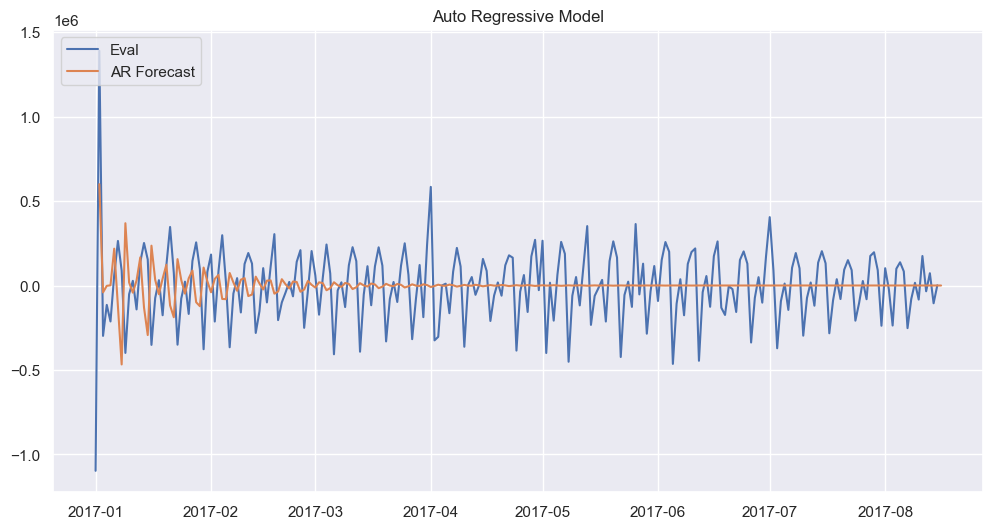

In [103]:
# plot the evaluation and model predictions

plt.figure(figsize = (12,6))
plt.plot(eval_set['firstDiff'], label = 'Eval')
plt.plot (AR_pred, label = 'AR Forecast')
plt.legend(loc='upper left')
plt.title('Auto Regressive Model')
plt.show()

In [107]:
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(eval_set['firstDiff'], AR_pred)
rmse = np.sqrt(mean_squared_error(eval_set['firstDiff'], AR_pred)).round(2)
mae = mean_absolute_error(eval_set['firstDiff'], AR_pred).round(2)

# Create results DataFrame
results_1 = pd.DataFrame([['AR', mse, rmse, mae]], columns=['Model', 'MSE', 'RMSE', 'MAE'])

results_1

Model               MSE       RMSE        MAE
0    AR 65,150,803,826.75 255,246.55 176,762.17

## ARIMA model

In [110]:
# We use pmdarima to determine the best parameter for our ARIMA model.
from pmdarima import auto_arima
stepwise_fit = auto_arima(training_set['firstDiff'].dropna(), trace = True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=38634.562, Time=1.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=39190.075, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=39174.027, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=38981.658, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=39188.106, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=38668.017, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=38671.450, Time=0.57 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=38650.185, Time=0.86 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=38332.484, Time=2.16 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=38701.011, Time=0.44 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.83 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=38541.028, Time=1.18 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=38674.541, Time=1.08 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=38317.411, Time=3.52 sec
 ARIMA(4,0,4)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1460
Model:               SARIMAX(5, 0, 2)   Log Likelihood              -19034.996
Date:                Tue, 11 Jun 2024   AIC                          38085.992
Time:                        04:37:18   BIC                          38128.282
Sample:                    01-02-2013   HQIC                         38101.768
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1829      0.021      8.542      0.000       0.141       0.225
ar.L2         -0.7341      0.019    -38.589      0.000      -0.771      -0.697
ar.L3         -0.2588      0.023    -11.470      0.000      -0.303      -0.215
ar.L4         -0.3541      0.019    -18.344      0.000      -0.392      -0.316
ar.L5         -0.4961      0.019    -26.029      0.000      -0.534      -0.459
ma.L1         -0.7459      0.023    -32.861      0.000      -0.790      -0.701
ma.L2          0.5728      0.020     28.553      0.000       0.533       0.612
sigma2      1.226e+10   3.36e-12   3.65e+21      0.000    1.23e+10    1.23e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             33274.76
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               3.71   Skew:                            -1.64
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.1e+36. Standard errors may be unstable.
"""

In [111]:
# create ARIMA model with bestparameter 

model_2 = ARIMA(training_set['firstDiff'].dropna(), order=(5,0,2))
model_2_fit = model_2.fit()
model_2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              firstDiff   No. Observations:                 1460
Model:                 ARIMA(5, 0, 2)   Log Likelihood              -19034.956
Date:                Tue, 11 Jun 2024   AIC                          38087.912
Time:                        04:38:45   BIC                          38135.488
Sample:                    01-02-2013   HQIC                         38105.659
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        757.8775    953.165      0.795      0.427   -1110.291    2626.046
ar.L1          0.1828      0.022      8.470      0.000       0.140       0.225
ar.L2         -0.7340      0.019    -38.594      0.000      -0.771      -0.697
ar.L3         -0.2589      0.023    -11.460      0.000      -0.303      -0.215
ar.L4         -0.3540      0.019    -18.288      0.000      -0.392      -0.316
ar.L5         -0.4962      0.019    -26.111      0.000      -0.533      -0.459
ma.L1         -0.7457      0.023    -32.342      0.000      -0.791      -0.701
ma.L2          0.5727      0.021     27.911      0.000       0.532       0.613
sigma2      1.226e+10      0.001    8.3e+12      0.000    1.23e+10    1.23e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             33258.82
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               3.71   Skew:                            -1.64
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.72e+27. Standard errors may be unstable.
"""

In [114]:
# Make predictions on the test data

ARIMA_pred = model_2_fit.predict(start=len(training_set['firstDiff'].dropna()),
                                 end=len(training_set['firstDiff'].dropna()) + len(eval_set['firstDiff']) - 1,
                                 typ="levels")

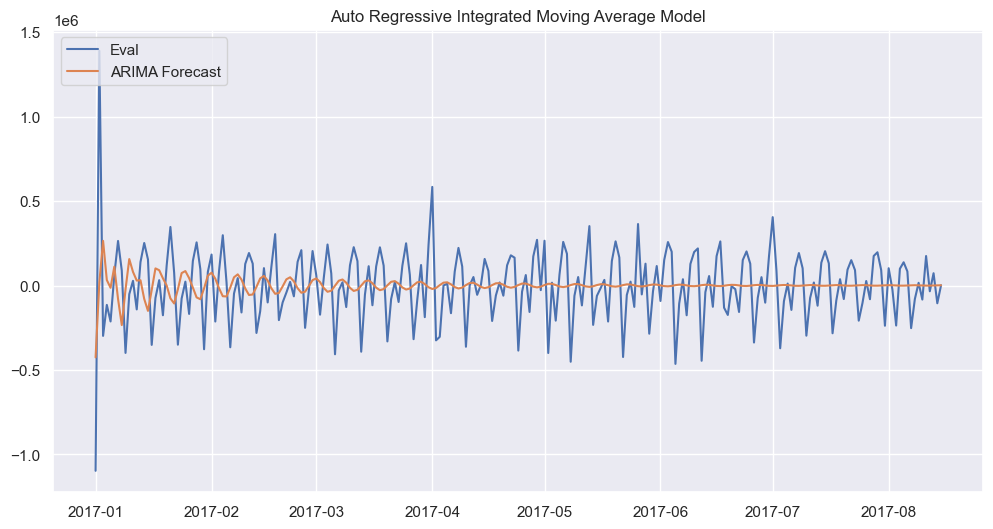

In [115]:
# plot the evaluation and model predictions

plt.figure(figsize = (12,6))
plt.plot(eval_set['firstDiff'], label = 'Eval')
plt.plot (ARIMA_pred, label = 'ARIMA Forecast')
plt.legend(loc='upper left')
plt.title('Auto Regressive Integrated Moving Average Model')
plt.show()

In [116]:
mse = mean_squared_error(eval_set['firstDiff'], ARIMA_pred)
rmse = np.sqrt(mean_squared_error(eval_set['firstDiff'], ARIMA_pred)).round(2)
mae = mean_absolute_error(eval_set['firstDiff'], ARIMA_pred).round(2)


model_results = pd.DataFrame([['ARIMA', mse, rmse, mae]], columns = ['Model', 'MSE', 'RMSE', 'MAE'])
results_2 = pd.concat([results_1, model_results], ignore_index=True)
results_2

Model               MSE       RMSE        MAE
0     AR 65,150,803,826.75 255,246.55 176,762.17
1  ARIMA 50,444,924,626.31 224,599.48 171,405.65

## SARIMA model

In [117]:
# Create SARIMA model

model_3 = SARIMAX(training_set['firstDiff'].dropna(), order=(5,0,2), seasonal_order=(5,0,2,7)) 
model_3_fit = model_3.fit()
model_3_fit.summary()

c:\Users\jmutonyi\Desktop\Data Science\Azubi Data Analytics\P3\Time-Series-Forecasting-Store-Sales-Prediction\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         firstDiff   No. Observations:                 1460
Model:             SARIMAX(5, 0, 2)x(5, 0, 2, 7)   Log Likelihood              -18846.350
Date:                           Tue, 11 Jun 2024   AIC                          37722.700
Time:                                   04:45:21   BIC                          37801.993
Sample:                               01-02-2013   HQIC                         37752.279
                                    - 12-31-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5220      0.213     -2.452      0.014      -0.939      -0.105
ar.L2          0.4362      0.093      4.669      0.000       0.253       0.619
ar.L3          0.1444      0.043      3.346      0.001       0.060       0.229
ar.L4          0.0673      0.045      1.502      0.133      -0.021       0.155
ar.L5          0.0218      0.039      0.558      0.577      -0.055       0.098
ma.L1         -0.0546      0.215     -0.254      0.799      -0.476       0.366
ma.L2         -0.8848      0.208     -4.244      0.000      -1.293      -0.476
ar.S.L7        0.2779      0.038      7.254      0.000       0.203       0.353
ar.S.L14       0.9919      0.049     20.442      0.000       0.897       1.087
ar.S.L21      -0.2619      0.056     -4.663      0.000      -0.372      -0.152
ar.S.L28      -0.0834      0.042     -2.008      0.045      -0.165      -0.002
ar.S.L35       0.0739      0.055      1.353      0.176      -0.033       0.181
ma.S.L7        0.0109      0.028      0.384      0.701      -0.045       0.067
ma.S.L14      -0.9424      0.024    -39.922      0.000      -0.989      -0.896
sigma2      1.226e+10   2.95e-11   4.16e+20      0.000    1.23e+10    1.23e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            111453.87
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               3.22   Skew:                            -2.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        45.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.09e+36. Standard errors may be unstable.
"""

In [118]:
# Make predictions on the test data

SARIMA_pred = model_3_fit.predict(start=len(training_set['firstDiff']),
                                 end=len(training_set['firstDiff']) + len(eval_set['sales']) - 1,
                                 typ="levels")

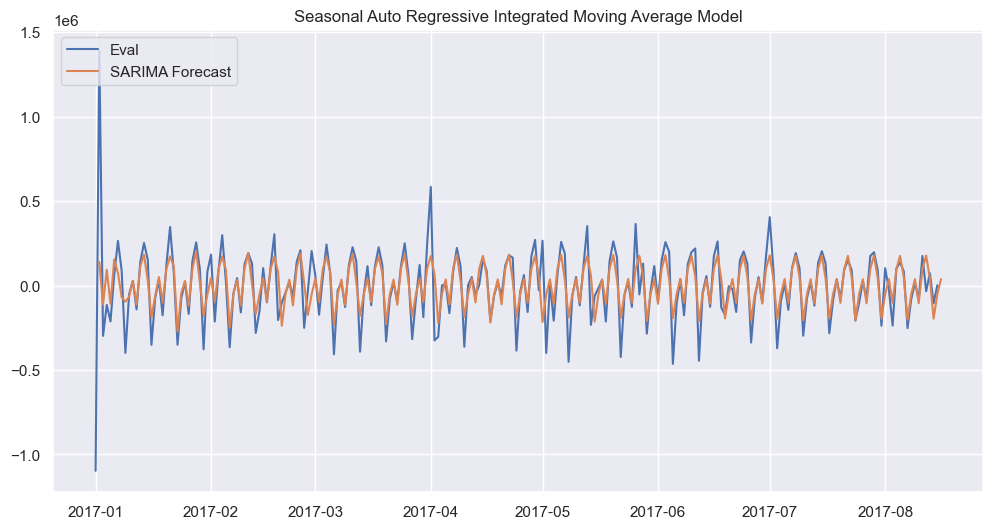

In [120]:
# plot the evaluation and model predictions

plt.figure(figsize = (12,6))
plt.plot(eval_set['firstDiff'], label = 'Eval')
plt.plot (SARIMA_pred, label = 'SARIMA Forecast')
plt.legend(loc='upper left')
plt.title('Seasonal Auto Regressive Integrated Moving Average Model')
plt.show()

In [121]:
mse = mean_squared_error(eval_set['firstDiff'], SARIMA_pred)
rmse = np.sqrt(mean_squared_error(eval_set['firstDiff'], SARIMA_pred)).round(2)
mae = mean_absolute_error(eval_set['firstDiff'], SARIMA_pred).round(2)


model_results = pd.DataFrame([['SARIMA', mse, rmse, mae]], columns = ['Model', 'MSE', 'RMSE', 'MAE'])
results_3 = pd.concat([results_2, model_results], ignore_index=True)
results_3

Model               MSE       RMSE        MAE
0      AR 65,150,803,826.75 255,246.55 176,762.17
1   ARIMA 50,444,924,626.31 224,599.48 171,405.65
2  SARIMA 61,561,644,111.82 248,116.19 193,851.84

### Backtesting

In [ ]:
backtests = {
    1: ('2017-05-31', '2017-06-30'),
    2: ('2017-06-30', '2017-07-31'),
    3: ('2017-07-31', '2017-08-31')
}

# Backtests with ARIMA Model
scores = {}

for period in backtests.values():

    # Convert date strings to datetime objects
    start_date = pd.to_datetime(period[0])
    end_date = pd.to_datetime(period[1])

    # Filter the DataFrame based on datetime comparisons
    _train = merged_monthly_mean.reset_index()[merged_monthly_mean.reset_index()['date'] < start_date]
    _test = merged_monthly_mean.reset_index()[(merged_monthly_mean.reset_index()['date'] >= start_date) & (merged_monthly_mean.reset_index()['date'] <= end_date)]
    
    Xtrain = _train.sales.values
    Xtest = _test.sales.values
    
    try:
        model = ARIMA(Xtrain, order=(1, 1, 0)).fit()

        # Initialize an empty array to store predictions
        ypred = []

        # Iterate through each data point in the test set and predict one step ahead
        for i in range(len(Xtest)):
            # Predict one step ahead by retraining the model
            ARIMA_model = ARIMA(Xtrain, order=(1, 1, 0)).fit()
            prediction = ARIMA_model.forecast(steps=1)[0]
            
            # Append the prediction to the result
            ypred.append(prediction)

            # Update the training data with the actual value
            Xtrain = np.append(Xtrain, Xtest[i])

        # Calculate RMSLE for the entire period
        rmsle = np.sqrt(mean_squared_log_error(Xtest, ypred))
        scores[str(period)] = rmsle
    except Exception as e:
        print(f"Error in period {period}: {str(e)}")

print(scores)


{"('2017-05-31', '2017-06-30')": 0.008402829695229236, "('2017-06-30', '2017-07-31')": 0.005966513027515765, "('2017-07-31', '2017-08-31')": 0.03596285186453937}


### Predictions

In [122]:
future_dates = pd.DataFrame(pd.date_range(start='2017-08-16', end='2017-08-31', freq='D'), columns=['dates'])
future_dates.set_index('dates', inplace=True)
future_dates.head()

Empty DataFrame
Columns: []
Index: [2017-08-16 00:00:00, 2017-08-17 00:00:00, 2017-08-18 00:00:00, 2017-08-19 00:00:00, 2017-08-20 00:00:00]

In [123]:
model_2_fit.predict(start=future_dates.index[0], end=future_dates.index[-1])

2017-08-16   1,409.14
2017-08-17     511.80
2017-08-18    -164.04
2017-08-19    -125.00
2017-08-20     569.25
2017-08-21   1,374.12
2017-08-22   1,686.02
2017-08-23   1,294.01
2017-08-24     519.88
2017-08-25     -44.02
2017-08-26      12.85
2017-08-27     621.61
2017-08-28   1,305.69
2017-08-29   1,552.89
2017-08-30   1,198.00
2017-08-31     530.83
Freq: D, Name: predicted_mean, dtype: float64